# Regression Analysis will be conducted in SPSS

## Dataset overview

- Since I used a ton of different csv exports, you might need to adjust the csv file names to replicate my analysis

In [2]:
import pandas as pd
df_analysed = pd.read_csv('winsorised_diversity_measures_per_country_per_day.csv', low_memory=False)
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_columns', None)
display(df_analysed)

## Exporting the df_analysed to SPSS

- First I had to remove all special characters and underscores from my column names

In [ ]:
import pandas as pd
import re

# Assuming df_analysed is already defined and loaded with data

# Function to clean column names
def clean_column_name(name):
    # Replace spaces with underscores
    name = name.replace(' ', '_')
    # Remove any characters that are not letters, numbers, or underscores
    name = re.sub(r'\W', '', name)
    # Ensure the name starts with a letter
    if not name[0].isalpha():
        name = 'var_' + name
    return name

# Clean the column names
df_analysed.columns = [clean_column_name(col) for col in df_analysed.columns]

- Dropping release_date NaN values

In [14]:
import pandas as pd

# Assuming df_analysed is already defined and loaded with data

# Convert 'release_date' to datetime to ensure correct NaN detection
df_analysed['release_date'] = pd.to_datetime(df_analysed['release_date'], errors='coerce')

# Calculate the number of NaN values in 'release_date'
num_nan_release_date = df_analysed['release_date'].isna().sum()

# Calculate the total number of rows
total_rows = len(df_analysed)

# Calculate the ratio of NaN values in 'release_date' to the total number of rows
nan_ratio = num_nan_release_date / total_rows

# Print the results
print(f"Number of NaN values in 'release_date': {num_nan_release_date}")
print(f"Total number of rows: {total_rows}")
print(f"Ratio of NaN values in 'release_date' to total rows: {nan_ratio:.4f}")

Number of NaN values in 'release_date': 193381
Total number of rows: 11501455
Ratio of NaN values in 'release_date' to total rows: 0.0168


In [16]:
import pandas as pd
import pyreadstat
import numpy as np

# Step 1: Verify and convert data types
def convert_types(df):
    # Convert 'date' and 'release_date' to datetime
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    if 'release_date' in df.columns:
        df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    
    # Convert scale variables to numeric
    scale_vars = [
        'streams', 'danceability', 'energy', 'loudness', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
        'duration_ms', 'track_popularity', 'artist_popularity', 
        'local_content_pct', 'year', 'Gini_coefficient_track_popularity', 
        'Gini_coefficient_artist_popularity', 'Shannon_Genre_Diversity', 
        'unweighted_Z_score', 'weighted_Z_score', 'weighted_Zscore_country_adjusted',
        'abs_weighted_Z_score_country_adjusted'
    ]
    for var in scale_vars:
        if var in df.columns:
            df[var] = pd.to_numeric(df[var], errors='coerce')
    
    return df

# Apply type conversion
df_analysed = convert_types(df_analysed)

# Step 2: Drop rows with NaN in 'release_date'
df_analysed = df_analysed.dropna(subset=['release_date'])

# Step 3: Handle remaining missing values
for col in df_analysed.columns:
    if df_analysed[col].dtype.kind in 'biufc':  # Check for numeric types
        df_analysed[col].fillna(np.nan, inplace=True)  # Use NaN for missing numeric values
    else:
        df_analysed[col].fillna('missing', inplace=True)  # Use 'missing' for non-numeric values

# Step 4: Verify the data types
print(df_analysed.dtypes)

# Step 5: Export to SPSS .sav file
pyreadstat.write_sav(df_analysed, 'regression_analysis.sav')

print("DataFrame has been successfully converted to an SPSS .sav file.")

country                                          object
date                                     datetime64[ns]
position                                          int64
artist                                           object
streams                                           int64
track_id                                         object
label_1                                          object
origin_song                                      object
danceability                                    float64
energy                                          float64
key                                               int64
loudness                                        float64
mode                                              int64
speechiness                                     float64
acousticness                                    float64
instrumentalness                                float64
liveness                                        float64
valence                                         

## Standardising variables

In [41]:
import pandas as pd

# Assuming df_analysed is already loaded
# List of variables to normalize
variables_to_normalize = ['loudness', 'tempo', 'artist_popularity', 'track_popularity', 'duration_ms']

# Standardising the variables and save them with new names
for var in variables_to_normalize:
    mean = df_analysed[var].mean()
    std = df_analysed[var].std()
    df_analysed[f'{var}_standardised'] = (df_analysed[var] - mean) / std

display(df_analysed)

,country,date,position,artist,streams,track_id,label_1,origin_song,danceability,energy,...,Shannons_Genre_Diversity,unweighted_Zscore,weighted_Zscore,weighted_Zscore_country_adjusted,abs_weighted_Z_score_country_adjusted,loudness_standardised,tempo_standardised,artist_popularity_standardised,track_popularity_standardised,duration_ms_standardised
0,United States,2020-06-20,1,DaBaby,372894,7ytR5pFWmSjzHJIeQkgog4,South Coast Music Group,United States,0.285406,0.558898,...,4.324556,0.275058,0.188247,0.252397,0.252397,-0.834971,-1.041584,0.367421,0.976368,-0.722867
1,United States,2020-06-20,65,DaBaby,366419,6Ozh9Ok6h4Oi1wUSLtBseN,South Coast Music Group,United States,0.459331,1.201818,...,4.324556,0.834211,0.851690,0.668375,0.668375,0.906677,0.211425,0.367421,0.944479,-1.225747
2,United States,2020-06-20,112,DaBaby,271927,2gwkD6igEhQbDQegRCcdoB,South Coast Music Group,United States,1.268459,0.373313,...,4.324556,0.986919,0.996963,1.030487,1.030487,-0.200627,-1.536481,0.367421,0.721256,-1.143411
3,United States,2020-06-20,155,DaBaby,231873,0fySG6A6qLE8IvDpayb5bM,South Coast Music Group,United States,0.451769,0.307032,...,4.324556,0.663626,0.559726,0.459549,0.459549,1.423534,1.145128,0.367421,0.657479,-1.563315
4,United States,2020-06-20,200,DaBaby,205936,2FvD20Z8aoWIePi7PoN8sG,South Coast Music Group,United States,0.814742,-0.156931,...,4.324556,0.608877,0.369259,0.565938,0.565938,0.806835,1.343230,0.367421,0.657479,-1.759027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11501450,Nicaragua,2017-01-09,2,Shakira,1508,6mICuAdrwEjh6Y6lroV2Kg,Sony,United States,0.875822,0.624448,...,1.945910,0.530954,0.499417,0.135451,0.135451,1.331868,-0.630976,0.926141,1.040145,-0.400669
11501451,Nicaragua,2017-01-09,4,The Chainsmokers,1446,7BKLCZ1jbUBVqRi2FVlTVw,Disruptor Records,United States,0.213038,-1.810479,...,1.945910,0.585222,-0.284906,-0.466421,0.466421,0.179376,-0.870182,0.576941,1.295257,0.721208
11501452,Nicaragua,2017-01-09,7,DJ Snake,1289,4pdPtRcBmOSQDlJ3Fk945m,Universal,United States,-1.520398,0.086612,...,1.945910,0.851271,-1.117058,-0.722912,0.722912,0.304179,2.700687,0.367421,-1.415300,-0.169830
11501453,Nicaragua,2017-01-09,5,CNCO,1436,3AEZUABDXNtecAOSC1qTfo,Sony,United States,0.295886,1.260071,...,1.945910,0.436726,0.305763,0.187137,0.187137,1.266454,-0.905464,-0.470660,0.880701,0.209602


/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

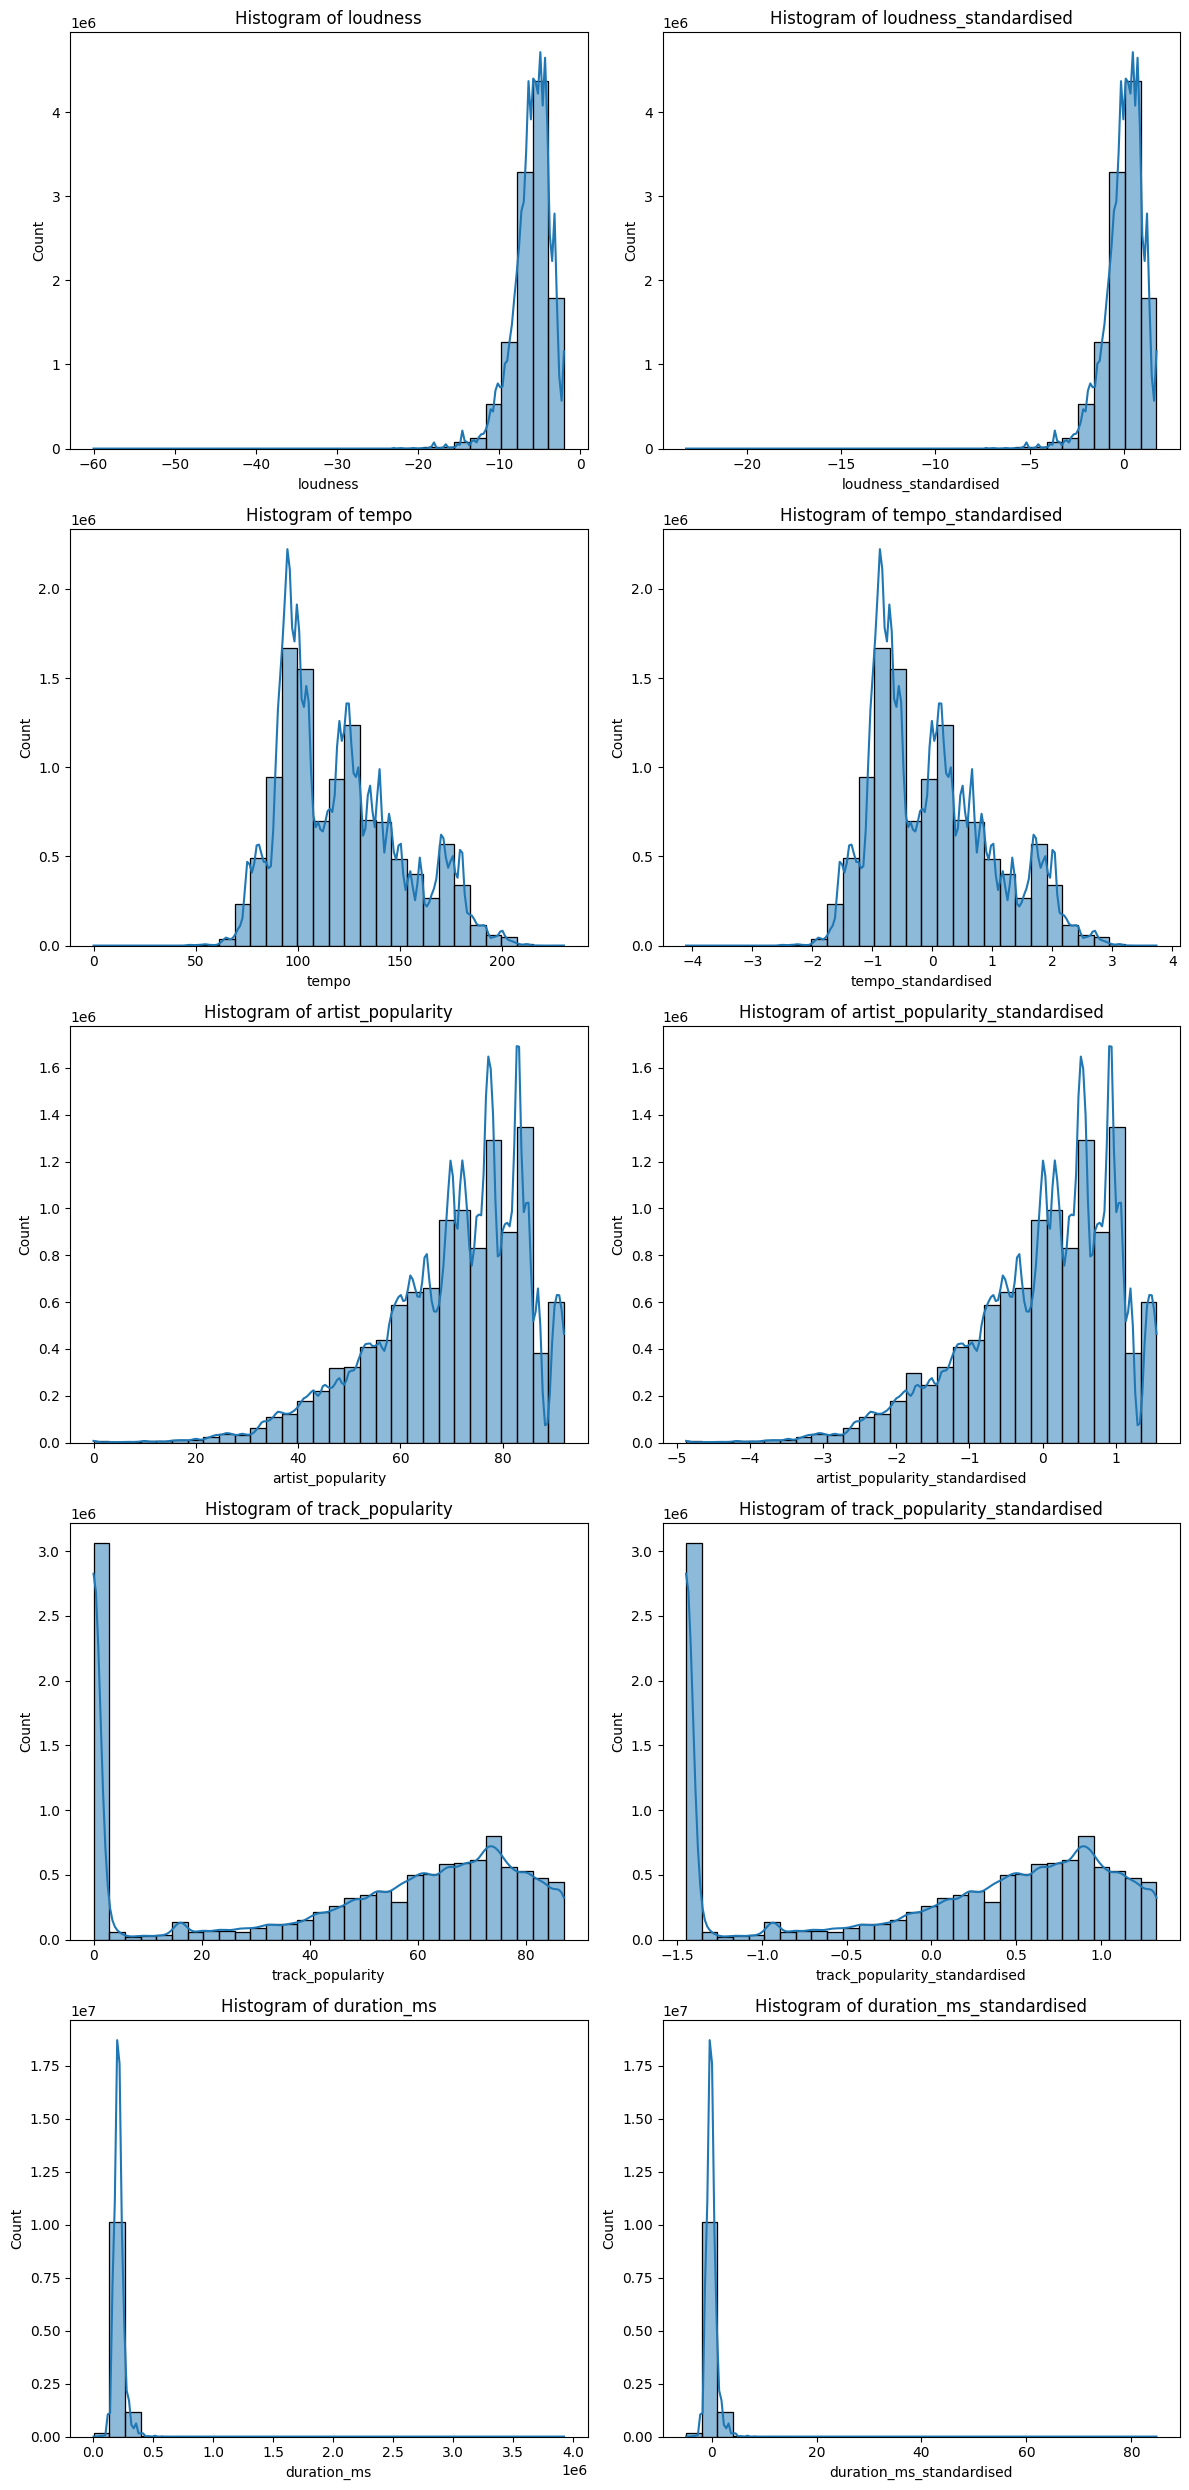

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_analysed is already loaded and normalized variables are present
# List of original and normalized variable pairs
variables = [
    ('loudness', 'loudness_standardised'),
    ('tempo', 'tempo_standardised'),
    ('artist_popularity', 'artist_popularity_standardised'),
    ('track_popularity', 'track_popularity_standardised'),
    ('duration_ms', 'duration_ms_standardised')
]

# Function to plot histograms before and after normalization
def plot_histograms(df, variable_pairs):
    num_vars = len(variable_pairs)
    fig, axes = plt.subplots(num_vars, 2, figsize=(12, 5 * num_vars))
    
    for i, (original_var, norm_var) in enumerate(variable_pairs):
        # Plot original variable
        sns.histplot(df[original_var], bins=30, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {original_var}')
        
        # Plot normalized variable
        sns.histplot(df[norm_var], bins=30, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {norm_var}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot histograms for the specified variables
plot_histograms(df_analysed, variables)

/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

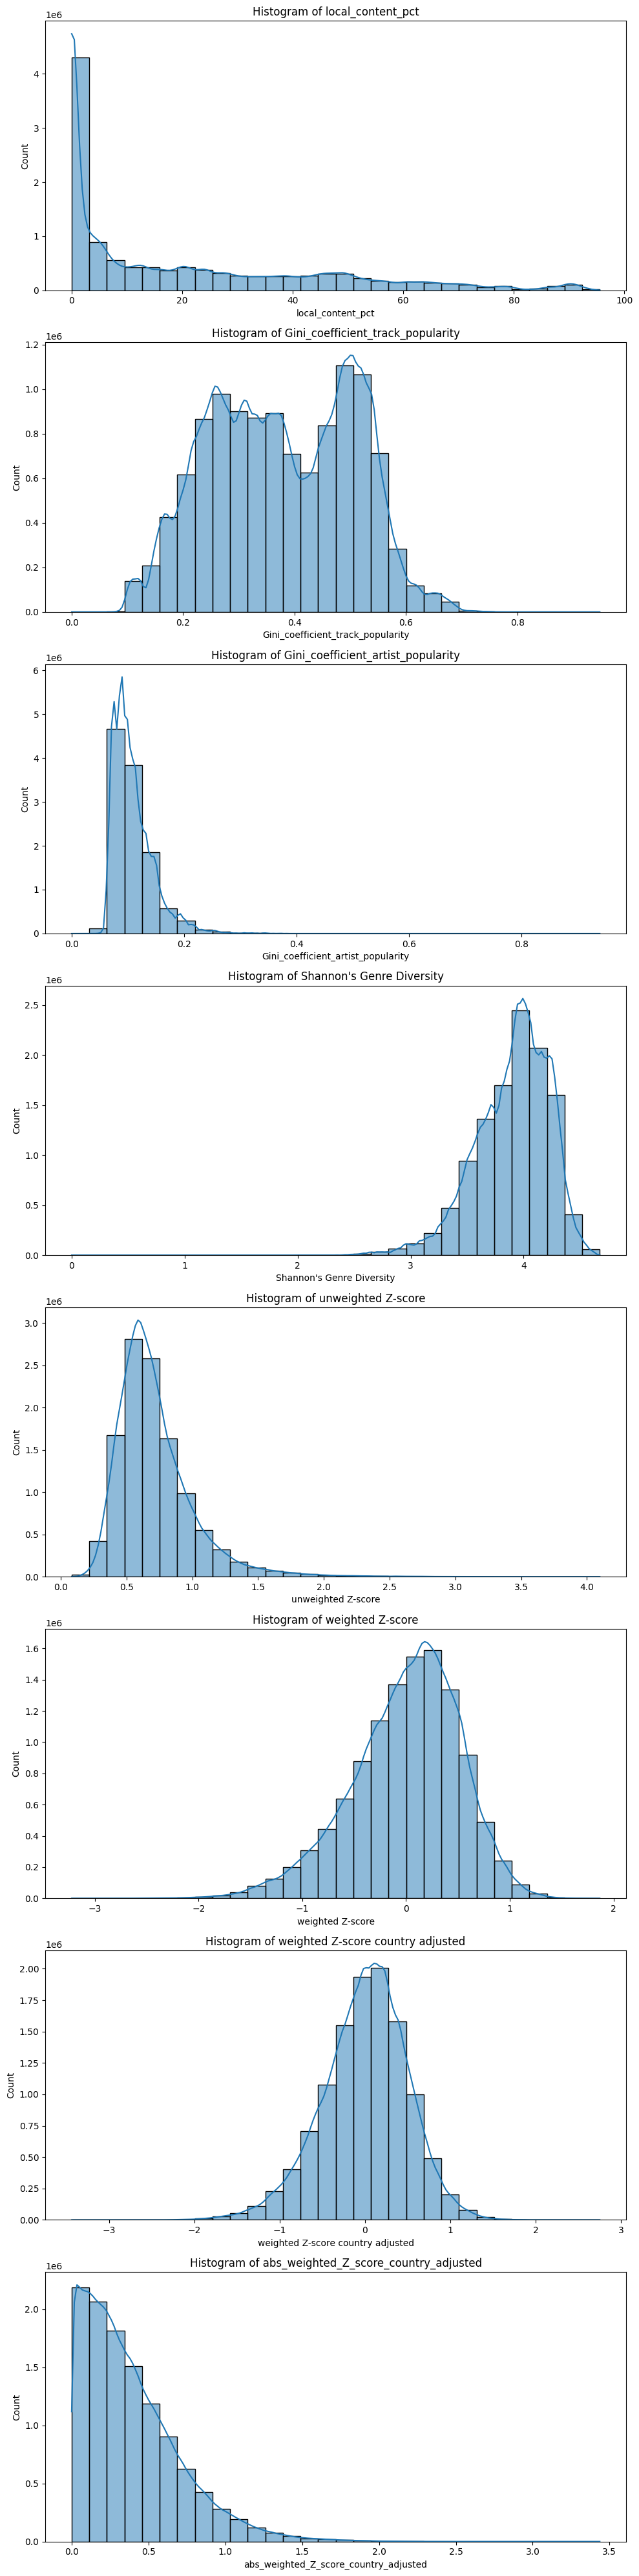

In [7]:
# List of variables to plot histograms for (excluding the standardised ones)
variables_to_plot = [
    'local_content_pct', 'Gini_coefficient_track_popularity', 'Gini_coefficient_artist_popularity',
    "Shannon's Genre Diversity", 'unweighted Z-score', 'weighted Z-score',
    'weighted Z-score country adjusted', 'abs_weighted_Z_score_country_adjusted'
]

# Function to plot histograms before normalization
def plot_histograms(df, variables):
    num_vars = len(variables)
    fig, axes = plt.subplots(num_vars, 1, figsize=(10, 5 * num_vars))
    
    for i, var in enumerate(variables):
        sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {var}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot histograms for the specified variables
plot_histograms(df_analysed, variables_to_plot)

/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

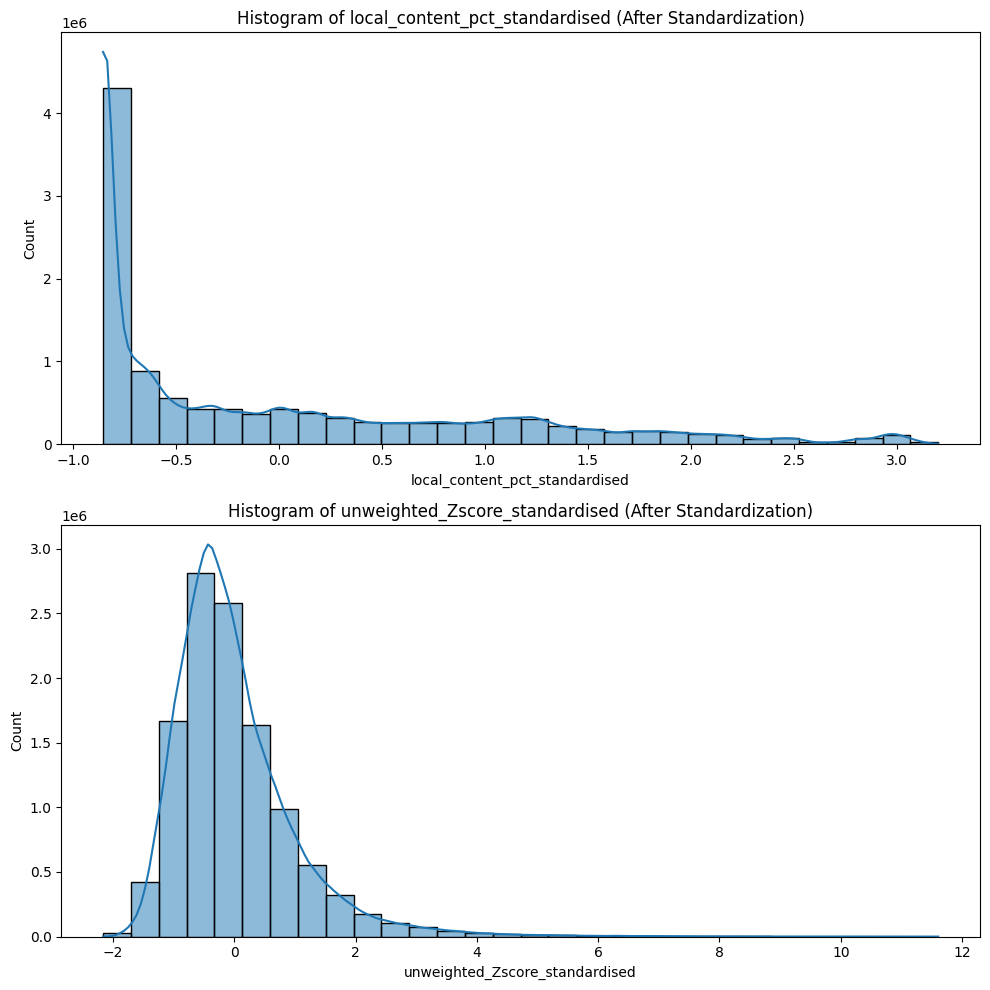

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to normalize
variables_to_standardise = [
    'local_content_pct', 
    'unweighted_Zscore'
]

# Normalize the variables and save them with new names
for var in variables_to_standardise:
    mean = df_analysed[var].mean()
    std = df_analysed[var].std()
    df_analysed[f'{var}_standardised'] = (df_analysed[var] - mean) / std

# Plot histograms for the specified variables after standardization
def plot_histograms_after(df, variables):
    num_vars = len(variables)
    fig, axes = plt.subplots(num_vars, 1, figsize=(10, 5 * num_vars))
    
    # If there's only one variable, axes is not a list
    if num_vars == 1:
        axes = [axes]
    
    for i, var in enumerate(variables):
        std_var = f'{var}_standardised'
        sns.histplot(df[std_var], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {std_var} (After Standardization)')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_histograms_after(df_analysed, variables_to_standardise)

In [48]:
display(df_analysed.head())

,country,date,position,artist,streams,track_id,label_1,origin_song,danceability,energy,...,artist_popularity_standardised,track_popularity_standardised,duration_ms_standardised,loudness_norm,tempo_norm,artist_popularity_norm,track_popularity_norm,duration_ms_norm,local_content_pct_standardised,unweighted_Zscore_standardised
0,United States,2020-06-20,1,DaBaby,372894,7ytR5pFWmSjzHJIeQkgog4,South Coast Music Group,United States,0.285406,0.558898,...,0.367421,0.976368,-0.722867,-0.834971,-1.041584,0.367421,0.976368,-0.722867,3.031022,-1.502403
1,United States,2020-06-20,65,DaBaby,366419,6Ozh9Ok6h4Oi1wUSLtBseN,South Coast Music Group,United States,0.459331,1.201818,...,0.367421,0.944479,-1.225747,0.906677,0.211425,0.367421,0.944479,-1.225747,3.031022,0.414699
2,United States,2020-06-20,112,DaBaby,271927,2gwkD6igEhQbDQegRCcdoB,South Coast Music Group,United States,1.268459,0.373313,...,0.367421,0.721256,-1.143411,-0.200627,-1.536481,0.367421,0.721256,-1.143411,3.031022,0.938269
3,United States,2020-06-20,155,DaBaby,231873,0fySG6A6qLE8IvDpayb5bM,South Coast Music Group,United States,0.451769,0.307032,...,0.367421,0.657479,-1.563315,1.423534,1.145128,0.367421,0.657479,-1.563315,3.031022,-0.170167
4,United States,2020-06-20,200,DaBaby,205936,2FvD20Z8aoWIePi7PoN8sG,South Coast Music Group,United States,0.814742,-0.156931,...,0.367421,0.657479,-1.759027,0.806835,1.343230,0.367421,0.657479,-1.759027,3.031022,-0.357877


In [49]:
import pandas as pd
import re
import pyreadstat
import numpy as np

# Assuming df_analysed is already defined and loaded with data

# Function to clean column names
def clean_column_name(name):
    # Replace spaces with underscores
    name = name.replace(' ', '_')
    # Remove any characters that are not letters, numbers, or underscores
    name = re.sub(r'\W', '', name)
    # Ensure the name starts with a letter
    if not name[0].isalpha():
        name = 'var_' + name
    return name

# Clean the column names
df_analysed.columns = [clean_column_name(col) for col in df_analysed.columns]

# Step 1: Verify and convert data types
def convert_types(df):
    # Convert 'date' to datetime
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Convert scale variables to numeric
    scale_vars = [
        'streams', 'danceability', 'energy', 'loudness', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
        'duration_ms', 'track_popularity', 'artist_popularity', 
        'local_content_pct', 'year', 'Gini_coefficient_track_popularity', 
        'Gini_coefficient_artist_popularity', 'Shannon_Genre_Diversity', 
        'unweighted_Z_score', 'weighted_Z_score', 'weighted_Z_score_country_adjusted',
        'abs_weighted_Z_score_country_adjusted', 'local_content_pct_norm', 
        'unweighted_Z_score_standardised', 'loudness_standardised', 'tempo_standardised', 
        'artist_popularity_standardised', 'track_popularity_standardised', 'duration_ms_standardised'
    ]
    for var in scale_vars:
        if var in df.columns:
            df[var] = pd.to_numeric(df[var], errors='coerce')
    
    return df

# Apply type conversion
df_analysed = convert_types(df_analysed)

# Step 2: Handle remaining missing values
for col in df_analysed.columns:
    if df_analysed[col].dtype.kind in 'biufc':  # Check for numeric types
        df_analysed[col].fillna(np.nan, inplace=True)  # Use NaN for missing numeric values
    else:
        df_analysed[col].fillna('missing', inplace=True)  # Use 'missing' for non-numeric values

# Step 3: Verify the data types
print(df_analysed.dtypes)

# Step 4: Export to SPSS .sav file
pyreadstat.write_sav(df_analysed, 'regression_analysis.sav')

print("DataFrame has been successfully converted to an SPSS .sav file.")

country                                          object
date                                     datetime64[ns]
position                                          int64
artist                                           object
streams                                           int64
track_id                                         object
label_1                                          object
origin_song                                      object
danceability                                    float64
energy                                          float64
key                                               int64
loudness                                        float64
mode                                              int64
speechiness                                     float64
acousticness                                    float64
instrumentalness                                float64
liveness                                        float64
valence                                         

## Correlation heatmaps

/Users/Intuitionism/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


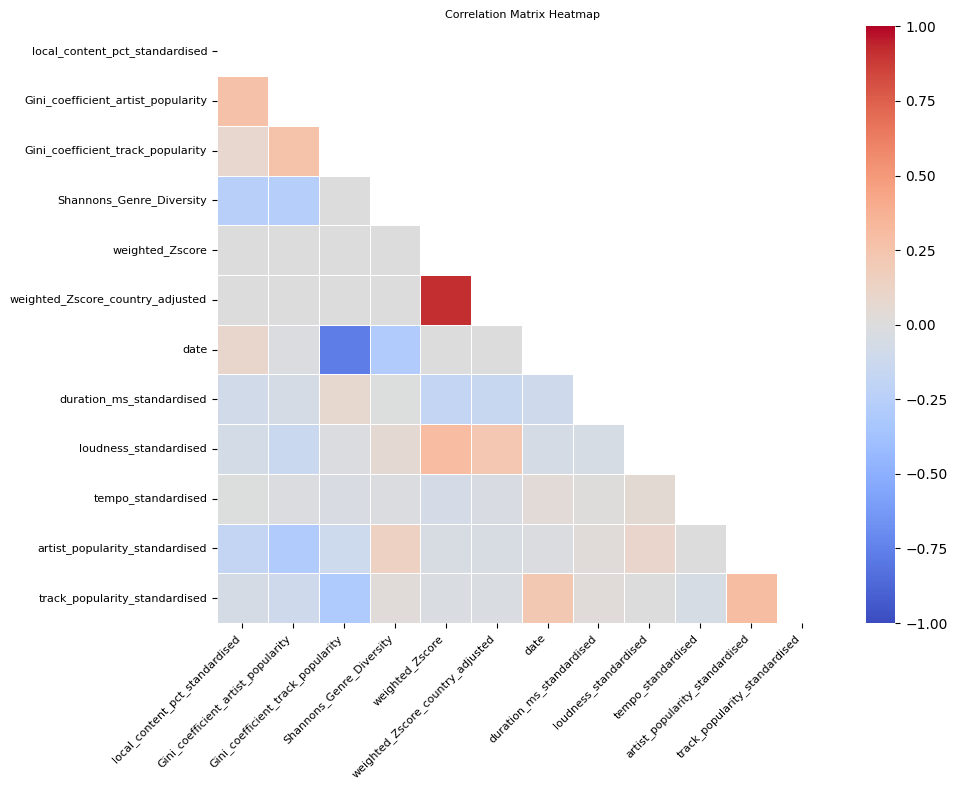

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_analysed is your DataFrame
# Compute the correlation matrix
correlation_matrix = df_analysed[['local_content_pct_standardised', 
                                  'Gini_coefficient_artist_popularity', 
                                  'Gini_coefficient_track_popularity', 
                                  'Shannons_Genre_Diversity', 
                                  'weighted_Zscore', 
                                  'weighted_Zscore_country_adjusted', 
                                  'date', 
                                  'duration_ms_standardised', 
                                  'loudness_standardised', 
                                  'tempo_standardised', 
                                  'artist_popularity_standardised', 'track_popularity_standardised']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5, annot_kws={"size": 8})

# Adjust the title and labels
plt.title('Correlation Matrix Heatmap', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Ensure the plot is displayed
plt.tight_layout()  # Adjust subplots to fit into figure area.

# Display the heatmap
plt.show()

# Case Study on Glocalisation: declining share of US artists around the globe

- As a part of local content share analysis, I wanted to pay special attention to the declining share of US artists which used to control the global charts for many decades

## Retain the existing local_content share

In [33]:
import pandas as pd

# Load your data
df = df_analysed.copy()

# Ensure date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate the total streams per country per day
total_streams_per_country_day = df.groupby(['country', 'date'])['streams'].sum().reset_index().rename(columns={'streams': 'streams_total'})

# Calculate the number of local streams per country per day
local_streams_per_country_day = df.groupby(['country', 'date']).apply(lambda x: x[x['local_content_pct'] > 0]['streams'].sum()).reset_index().rename(columns={0: 'streams_local'})

# Calculate the weighted average local content share per country per day
df['weighted_local_content'] = df['local_content_pct'] * df['streams']
weighted_local_content = df.groupby(['country', 'date']).apply(lambda x: x['weighted_local_content'].sum() / x['streams'].sum()).reset_index().rename(columns={0: 'local_content_share_percentage'})

# Merge with total streams and local streams data to keep the total streams and local streams columns
df_local_content = pd.merge(weighted_local_content, total_streams_per_country_day, on=['country', 'date'], how='left')
df_local_content = pd.merge(df_local_content, local_streams_per_country_day, on=['country', 'date'], how='left')

# Save the intermediate result to check
df_local_content.head()

,country,date,local_content_share_percentage,streams_total,streams_local
0,Argentina,2017-01-01,24.875622,7790797,7790797
1,Argentina,2017-01-02,16.748768,5989272,5989272
2,Argentina,2017-01-03,17.241379,5898482,5898482
3,Argentina,2017-01-04,14.778325,5982208,5982208
4,Argentina,2017-01-05,13.793103,6168995,6168995


## Share of US tracks per country per day

In [27]:
# Filter for US artists
df_us_artists = df[df['origin_song'] == 'United States']

# US streams per country and day
us_streams_per_country_day = df_us_artists.groupby(['country', 'date'])['streams'].sum().reset_index().rename(columns={'streams': 'streams_us'})

# Merge dataframes to get total and US streams
merged_streams_us = pd.merge(total_streams_per_country_day, us_streams_per_country_day, on=['country', 'date'], how='left')

# Fill NaN values with 0
merged_streams_us['streams_us'].fillna(0, inplace=True)

# Calculate share of US streams in percentage
merged_streams_us['us_share_percentage'] = (merged_streams_us['streams_us'] / merged_streams_us['streams_total']) * 100

# Save the intermediate result to check
merged_streams_us.head()

,country,date,streams_total,streams_us,us_share_percentage
0,Argentina,2017-01-01,7790797,4908712,63.006545
1,Argentina,2017-01-02,5989272,4082909,68.170372
2,Argentina,2017-01-03,5898482,4012571,68.027181
3,Argentina,2017-01-04,5982208,4089279,68.357352
4,Argentina,2017-01-05,6168995,4190233,67.924078


## Share of UK artists

In [28]:
# Filter for UK artists
df_uk_artists = df[df['origin_song'] == 'United Kingdom']

# UK streams per country and day
uk_streams_per_country_day = df_uk_artists.groupby(['country', 'date'])['streams'].sum().reset_index().rename(columns={'streams': 'streams_uk'})

# Merge dataframes to get total and UK streams
merged_streams_uk = pd.merge(total_streams_per_country_day, uk_streams_per_country_day, on=['country', 'date'], how='left')

# Fill NaN values with 0
merged_streams_uk['streams_uk'].fillna(0, inplace=True)

# Calculate share of UK streams in percentage
merged_streams_uk['uk_share_percentage'] = (merged_streams_uk['streams_uk'] / merged_streams_uk['streams_total']) * 100

# Save the intermediate result to check
merged_streams_uk.head()

,country,date,streams_total,streams_uk,uk_share_percentage
0,Argentina,2017-01-01,7790797,322609.0,4.140899
1,Argentina,2017-01-02,5989272,348989.0,5.826902
2,Argentina,2017-01-03,5898482,345882.0,5.863915
3,Argentina,2017-01-04,5982208,346505.0,5.792259
4,Argentina,2017-01-05,6168995,350499.0,5.681622


## Joint share of the rest of Anglosphere artists

In [29]:
# List of other Anglosphere countries (excluding US and UK)
other_anglosphere_countries = ['Ireland', 'Australia', 'Canada', 'New Zealand']

# Filter for other Anglosphere artists
df_other_anglosphere_artists = df[df['origin_song'].isin(other_anglosphere_countries)]

# Other Anglosphere streams per country and day
other_anglosphere_streams_per_country_day = df_other_anglosphere_artists.groupby(['country', 'date'])['streams'].sum().reset_index().rename(columns={'streams': 'streams_other_anglosphere'})

# Merge dataframes to get total and other Anglosphere streams
merged_streams_other_anglosphere = pd.merge(total_streams_per_country_day, other_anglosphere_streams_per_country_day, on=['country', 'date'], how='left')

# Fill NaN values with 0
merged_streams_other_anglosphere['streams_other_anglosphere'].fillna(0, inplace=True)

# Calculate share of other Anglosphere streams in percentage
merged_streams_other_anglosphere['other_anglosphere_share_percentage'] = (merged_streams_other_anglosphere['streams_other_anglosphere'] / merged_streams_other_anglosphere['streams_total']) * 100

# Save the intermediate result to check
merged_streams_other_anglosphere.head()

,country,date,streams_total,streams_other_anglosphere,other_anglosphere_share_percentage
0,Argentina,2017-01-01,7790797,0.0,0.0
1,Argentina,2017-01-02,5989272,0.0,0.0
2,Argentina,2017-01-03,5898482,0.0,0.0
3,Argentina,2017-01-04,5982208,0.0,0.0
4,Argentina,2017-01-05,6168995,0.0,0.0


## Melt the dataframe

In [34]:
# Combine all the share dataframes
merged_streams = pd.merge(merged_streams_us[['country', 'date', 'streams_us', 'us_share_percentage', 'streams_total']], 
                          merged_streams_uk[['country', 'date', 'streams_uk', 'uk_share_percentage']], 
                          on=['country', 'date'], how='left')
merged_streams = pd.merge(merged_streams, 
                          merged_streams_other_anglosphere[['country', 'date', 'streams_other_anglosphere', 'other_anglosphere_share_percentage']], 
                          on=['country', 'date'], how='left')

# Calculate total Anglosphere share (US + UK + other Anglosphere)
merged_streams['anglosphere_share_percentage'] = merged_streams['us_share_percentage'] + merged_streams['uk_share_percentage'] + merged_streams['other_anglosphere_share_percentage']

# Ensure no negative values
merged_streams['us_share_percentage'] = merged_streams['us_share_percentage'].clip(lower=0)
merged_streams['uk_share_percentage'] = merged_streams['uk_share_percentage'].clip(lower=0)
merged_streams['other_anglosphere_share_percentage'] = merged_streams['other_anglosphere_share_percentage'].clip(lower=0)
merged_streams['anglosphere_share_percentage'] = merged_streams['anglosphere_share_percentage'].clip(lower=0)

# Save the intermediate result to check
merged_streams.head()

,country,date,streams_us,us_share_percentage,streams_total,streams_uk,uk_share_percentage,streams_other_anglosphere,other_anglosphere_share_percentage,anglosphere_share_percentage
0,Argentina,2017-01-01,4908712,63.006545,7790797,322609.0,4.140899,0.0,0.0,67.147443
1,Argentina,2017-01-02,4082909,68.170372,5989272,348989.0,5.826902,0.0,0.0,73.997274
2,Argentina,2017-01-03,4012571,68.027181,5898482,345882.0,5.863915,0.0,0.0,73.891096
3,Argentina,2017-01-04,4089279,68.357352,5982208,346505.0,5.792259,0.0,0.0,74.149612
4,Argentina,2017-01-05,4190233,67.924078,6168995,350499.0,5.681622,0.0,0.0,73.605701


In [35]:
# Include local content share and local streams in the melted dataframe
merged_streams = pd.merge(merged_streams, df_local_content[['country', 'date', 'local_content_share_percentage', 'streams_local']], on=['country', 'date'], how='left')

# Melt the dataframe
melted_df = merged_streams.melt(id_vars=['country', 'date'], 
                                value_vars=['us_share_percentage', 'uk_share_percentage', 'anglosphere_share_percentage', 'local_content_share_percentage'],
                                var_name='Content Type', value_name='Share Percentage')


# Save the intermediate result to check
melted_df.head()

,country,date,Content Type,Share Percentage
0,Argentina,2017-01-01,us_share_percentage,63.006545
1,Argentina,2017-01-02,us_share_percentage,68.170372
2,Argentina,2017-01-03,us_share_percentage,68.027181
3,Argentina,2017-01-04,us_share_percentage,68.357352
4,Argentina,2017-01-05,us_share_percentage,67.924078


In [37]:
# Merge with the original shares, stream counts, and total streams
final_df = pd.merge(melted_df, merged_streams[['country', 'date', 'streams_us', 'streams_uk', 'streams_other_anglosphere', 'streams_local', 'streams_total',
                                             'us_share_percentage', 'uk_share_percentage', 'other_anglosphere_share_percentage', 'local_content_share_percentage']], 
                    on=['country', 'date'], how='left')

display(final_df.head())

,country,date,Content Type,Share Percentage,streams_us,streams_uk,streams_other_anglosphere,streams_local,streams_total,us_share_percentage,uk_share_percentage,other_anglosphere_share_percentage,local_content_share_percentage
0,Argentina,2017-01-01,us_share_percentage,63.006545,4908712,322609.0,0.0,7790797,7790797,63.006545,4.140899,0.0,24.875622
1,Argentina,2017-01-02,us_share_percentage,68.170372,4082909,348989.0,0.0,5989272,5989272,68.170372,5.826902,0.0,16.748768
2,Argentina,2017-01-03,us_share_percentage,68.027181,4012571,345882.0,0.0,5898482,5898482,68.027181,5.863915,0.0,17.241379
3,Argentina,2017-01-04,us_share_percentage,68.357352,4089279,346505.0,0.0,5982208,5982208,68.357352,5.792259,0.0,14.778325
4,Argentina,2017-01-05,us_share_percentage,67.924078,4190233,350499.0,0.0,6168995,6168995,67.924078,5.681622,0.0,13.793103


In [38]:
import gzip
# Export the final dataframe to a compressed CSV file
with gzip.open('case_study_glocalisation_final.csv.gz', 'wt', newline='') as f:
    final_df.to_csv(f, index=False)

# Case Study Rise of Local Genres

## Preparing the data

In [40]:
display(df_analysed.columns)

Index(['country', 'date', 'position', 'artist', 'streams', 'track_id',
       'label_1', 'origin_song', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'artist_id', 'isrc',
       'track_popularity', 'release_date', 'track_name', 'genres',
       'artist_popularity', 'genres_cleaned', 'is_local', 'local_content_pct',
       'year', 'Gini_coefficient_track_popularity',
       'Gini_coefficient_artist_popularity', 'Shannon's Genre Diversity',
       'unweighted Z-score', 'weighted Z-score',
       'weighted Z-score country adjusted',
       'abs_weighted_Z_score_country_adjusted'],
      dtype='object')

In [41]:
display(df_analysed)

,country,date,position,artist,streams,track_id,label_1,origin_song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist_id,isrc,track_popularity,release_date,track_name,genres,artist_popularity,genres_cleaned,is_local,local_content_pct,year,Gini_coefficient_track_popularity,Gini_coefficient_artist_popularity,Shannon's Genre Diversity,unweighted Z-score,weighted Z-score,weighted Z-score country adjusted,abs_weighted_Z_score_country_adjusted
0,United States,2020-06-20,1,DaBaby,372894,7ytR5pFWmSjzHJIeQkgog4,South Coast Music Group,United States,0.285406,0.558898,11,-7.956,1,0.207940,0.128533,-0.135082,-0.590824,0.018724,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4,4r63FhuTkUYltbVAg5TQnk,USUM72007941,76,2020-04-17,ROCKSTAR (feat. Roddy Ricch),"['hip hop', 'north carolina hip hop', 'pop rap...",75,"hip hop, north carolina hip hop, pop rap, rap,...",1,91.542289,2020,0.171484,0.067947,4.324556,0.275058,0.188247,0.252397,0.252397
1,United States,2020-06-20,65,DaBaby,366419,6Ozh9Ok6h4Oi1wUSLtBseN,South Coast Music Group,United States,0.459331,1.201818,11,-3.909,1,1.886579,-0.118814,-0.135082,-0.380135,1.657721,126.770,audio_features,6Ozh9Ok6h4Oi1wUSLtBseN,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,https://api.spotify.com/v1/tracks/6Ozh9Ok6h4Oi...,https://api.spotify.com/v1/audio-analysis/6Ozh...,159715,4,4r63FhuTkUYltbVAg5TQnk,USUM71918972,75,2019-09-27,BOP,"['hip hop', 'north carolina hip hop', 'pop rap...",75,"hip hop, north carolina hip hop, pop rap, rap,...",1,91.542289,2020,0.171484,0.067947,4.324556,0.834211,0.851690,0.668375,0.668375
2,United States,2020-06-20,112,DaBaby,271927,2gwkD6igEhQbDQegRCcdoB,South Coast Music Group,United States,1.268459,0.373313,2,-6.482,0,2.374460,-0.665535,-0.135082,-0.395184,1.696399,75.445,audio_features,2gwkD6igEhQbDQegRCcdoB,spotify:track:2gwkD6igEhQbDQegRCcdoB,https://api.spotify.com/v1/tracks/2gwkD6igEhQb...,https://api.spotify.com/v1/audio-analysis/2gwk...,163320,4,4r63FhuTkUYltbVAg5TQnk,USUM71902966,68,2019-03-01,Suge,"['hip hop', 'north carolina hip hop', 'pop rap...",75,"hip hop, north carolina hip hop, pop rap, rap,...",1,91.542289,2020,0.171484,0.067947,4.324556,0.986919,0.996963,1.030487,1.030487
3,United States,2020-06-20,155,DaBaby,231873,0fySG6A6qLE8IvDpayb5bM,South Coast Music Group,United States,0.451769,0.307032,1,-2.708,0,1.390430,-0.442923,-0.135082,-0.545677,1.372467,154.187,audio_features,0fySG6A6qLE8IvDpayb5bM,spotify:track:0fySG6A6qLE8IvDpayb5bM,https://api.spotify.com/v1/tracks/0fySG6A6qLE8...,https://api.spotify.com/v1/audio-analysis/0fyS...,144935,4,4r63FhuTkUYltbVAg5TQnk,USUM71919281,66,2019-09-27,VIBEZ,"['hip hop', 'north carolina hip hop', 'pop rap...",75,"hip hop, north carolina hip hop, pop rap, rap,...",1,91.542289,2020,0.171484,0.067947,4.324556,0.663626,0.559726,0.459549,0.459549
4,United States,2020-06-20,200,DaBaby,205936,2FvD20Z8aoWIePi7PoN8sG,South Coast Music Group,United States,0.814742,-0.156931,8,-4.141,1,1.671581,-0.586214,-0.134828,-0.661556,0.236290,160.004,audio_features,2FvD20Z8aoWIePi7PoN8sG,spotify:track:2FvD20Z8aoWIePi7PoN8sG,https://api.spotify.com/v1/tracks/2FvD20Z8aoWI...,https://api.spotify.com/v1/audio-analysis/2FvD...,136366,4,4r63FhuTkUYltbVAg5TQnk,USUM71919280,66,2019-09-27,TOES (feat. Lil Baby & Moneybagg Yo),"['hip hop', 'north carolina hip hop', 'pop rap...",75,"hip hop, north carolina hip hop, pop rap, rap,...",1,91.542289,2020,0.171484,0.067947,4.324556,0.608877,0.369259,0.565938,0.565938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11501450,Nicaragua,2017-01-09,2,Shakira,1508,6mICuAdrwEjh6Y6lroV2Kg,Sony,United States,0.875822,0.624448,8,-2.921,0,-0

In [51]:
import pandas as pd

# Assuming df_analysed is already loaded as a pandas DataFrame
df_case_study = df_analysed.copy()

# Keeping only the necessary columns
columns_to_keep = [
    'country', 'date', 'position', 'artist', 'streams', 'origin_song', 
    'track_name', 'genres_cleaned', "is_local", "Shannon's Genre Diversity"
]
df_case_study = df_case_study[columns_to_keep]

# Display the first few rows of the new DataFrame
df_case_study

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
0,United States,2020-06-20,1,DaBaby,372894,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",1,4.324556
1,United States,2020-06-20,65,DaBaby,366419,United States,BOP,"hip hop, north carolina hip hop, pop rap, rap,...",1,4.324556
2,United States,2020-06-20,112,DaBaby,271927,United States,Suge,"hip hop, north carolina hip hop, pop rap, rap,...",1,4.324556
3,United States,2020-06-20,155,DaBaby,231873,United States,VIBEZ,"hip hop, north carolina hip hop, pop rap, rap,...",1,4.324556
4,United States,2020-06-20,200,DaBaby,205936,United States,TOES (feat. Lil Baby & Moneybagg Yo),"hip hop, north carolina hip hop, pop rap, rap,...",1,4.324556
...,...,...,...,...,...,...,...,...,...,...
11501450,Nicaragua,2017-01-09,2,Shakira,1508,United States,Chantaje (feat. Maluma),"colombian pop, dance pop, latin pop, pop",0,1.945910
11501451,Nicaragua,2017-01-09,4,The Chainsmokers,1446,United States,Closer,pop,0,1.945910
11501452,Nicaragua,2017-01-09,7,DJ Snake,1289,United States,Let Me Love You,"edm, electronic trap, pop, pop dance",0,1.945910
11501453,Nicaragua,2017-01-09,5,CNCO,1436,United States,Reggaetón Lento (Bailemos),"boy band, latin pop, reggaeton, urbano latino",0,1.945910


## Australia

### Overview

In [52]:
# Filter the DataFrame for Australia
df_au = df_case_study[df_case_study['country'] == 'Australia'].copy()

# Display the first few rows of the filtered DataFrame
df_au

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
42838,Australia,2020-06-20,1,DaBaby,266080,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",0,4.474422
42839,Australia,2020-06-20,8,StaySolidRocky,143544,United States,Party Girl,melodic rap,0,4.474422
42840,Australia,2020-06-20,3,The Weeknd,193637,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",0,4.474422
42841,Australia,2020-06-20,38,The Weeknd,83794,United States,In Your Eyes,"canadian contemporary r&b, canadian pop, pop",0,4.474422
42842,Australia,2020-06-20,21,Lil Mosey,105336,United States,Blueberry Faygo,"melodic rap, rap conscient",0,4.474422
...,...,...,...,...,...,...,...,...,...,...
10794871,Australia,2017-12-24,60,PNAU,105118,Australia,Go Bang,"alternative dance, aussietronica, australian d...",1,4.398928
10794872,Australia,2017-12-24,94,"Harry Connick, Jr.",82162,United States,(It Must've Been Ol') Santa Claus,"adult standards, contemporary vocal jazz, loun...",0,4.398928
10794873,Australia,2017-12-24,107,Peking Duk,75339,Australia,Let You Down,"aussietronica, australian electropop, australi...",1,4.398928
10794874,Australia,2017-12-24,112,Kita Alexander,67796,United Kingdom,Hotel,"aussietronica, australian indie",0,4.398928


In [58]:
# Check the columns of the DataFrame
print(df_case_study.columns)

# Filter the DataFrame for Australia
df_au = df_case_study[df_case_study['country'] == 'Australia'].copy()

# Display the first few rows of the filtered DataFrame and check columns
print(df_au.head())
print(df_au.columns)

Index(['country', 'date', 'position', 'artist', 'streams', 'origin_song',
       'track_name', 'genres_cleaned', 'is_local',
       'Shannon's Genre Diversity'],
      dtype='object')
         country        date  position          artist  streams  \
42838  Australia  2020-06-20         1          DaBaby   266080   
42839  Australia  2020-06-20         8  StaySolidRocky   143544   
42840  Australia  2020-06-20         3      The Weeknd   193637   
42841  Australia  2020-06-20        38      The Weeknd    83794   
42842  Australia  2020-06-20        21       Lil Mosey   105336   

         origin_song                    track_name  \
42838  United States  ROCKSTAR (feat. Roddy Ricch)   
42839  United States                    Party Girl   
42840  United States               Blinding Lights   
42841  United States                  In Your Eyes   
42842  United States               Blueberry Faygo   

                                          genres_cleaned  is_local  \
42838  hip hop, no

In [57]:
# Check the unique values in the 'country' column of the original DataFrame
unique_countries = df_case_study['country'].unique()
print("Unique countries in the dataset:", unique_countries)

# Check if 'AU' is in the list of unique countries
if 'Australia' not in unique_countries:
    print("'AU' is not present in the dataset.")
else:
    print("'Australia' is present in the dataset.")

Unique countries in the dataset: ['United States' 'United Kingdom' 'Argentina' 'Austria' 'Australia'
 'Belgium' 'Bulgaria' 'Bolivia' 'Brazil' 'Canada' 'Switzerland' 'Chile'
 'Colombia' 'Costa Rica' 'Czech Republic' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Spain' 'Finland' 'France'
 'Greece' 'Guatemala' 'Hong Kong' 'Honduras' 'Indonesia' 'Ireland'
 'Iceland' 'Italy' 'Japan' 'Lithuania' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Panama' 'Philippines' 'Poland' 'Portugal' 'Paraguay'
 'Sweden' 'Singapore' 'Slovakia' 'El Salvador' 'Turkey' 'Taiwan' 'Uruguay'
 'Mexico' 'Nicaragua']
'AU' is present in the dataset.


In [60]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Confirm the unique values in 'is_local' column
print(df_case_study['is_local'].unique())

[ True False]


In [61]:
# Filter the DataFrame for Australia
df_au = df_case_study[df_case_study['origin_song'] == 'Australia'].copy()

# Display the first few rows of the filtered DataFrame and check columns
print(df_au.head())
print(df_au.columns)

           country        date  position       artist  streams origin_song  \
158  United States  2020-06-20       125  Tame Impala   258489   Australia   
353  United States  2020-06-19       139  Tame Impala   259767   Australia   
554  United States  2020-06-18       133  Tame Impala   251905   Australia   
753  United States  2020-06-17       134  Tame Impala   247085   Australia   
951  United States  2020-06-16       130  Tame Impala   246848   Australia   

                     track_name  \
158  The Less I Know The Better   
353  The Less I Know The Better   
554  The Less I Know The Better   
753  The Less I Know The Better   
951  The Less I Know The Better   

                                        genres_cleaned  is_local  \
158  australian psych, modern rock, neo-psychedelic...     False   
353  australian psych, modern rock, neo-psychedelic...     False   
554  australian psych, modern rock, neo-psychedelic...     False   
753  australian psych, modern rock, neo-psychede

In [62]:
# Check the unique values in the `is_local` column
print(df_au['is_local'].unique())

# Display a few rows where is_local is True and False
print(df_au[df_au['is_local']].head())
print(df_au[~df_au['is_local']].head())

[False  True]
         country        date  position       artist  streams origin_song  \
42910  Australia  2020-06-20        68  Tones And I    54486   Australia   
42930  Australia  2020-06-20        83  Tame Impala    46748   Australia   
42971  Australia  2020-06-20        76   Dean Lewis    50052   Australia   
42972  Australia  2020-06-20        53        Flume    62737   Australia   
42999  Australia  2020-06-20        99    Vance Joy    42344   Australia   

                       track_name  \
42910         Never Seen the Rain   
42930  The Less I Know The Better   
42971                  Be Alright   
42972                Rushing Back   
42999                     Riptide   

                                          genres_cleaned  is_local  \
42910                                     australian pop      True   
42930  australian psych, modern rock, neo-psychedelic...      True   
42971                                australian pop, pop      True   
42972  australian dance, a

In [72]:
from collections import Counter
import itertools

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_au.columns and not df_au['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_au['genre_list'] = df_au['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_au[df_au['is_local']]
    non_local_tracks = df_au[~df_au['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_au = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_au = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_au = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_au = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_au = pd.merge(df_local_genre_counts_au, df_local_genre_streams_au, on='genre')
    df_local_genre_summary_au = df_local_genre_summary_au.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_au = pd.merge(df_non_local_genre_counts_au, df_non_local_genre_streams_au, on='genre')
    df_non_local_genre_summary_au = df_non_local_genre_summary_au.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_au)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_au)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                           genre  count    streams
0                 australian pop   5858  334381754
1               australian indie   4767  219635264
2                  aussietronica   3911  187636635
3          australian electropop   3204  165021779
4                            pop   2020  138920784
5               australian dance   2643  123241066
6                            edm   2289  120542216
7             australian hip hop   2911  119457239
8                   indietronica   1724   76981637
9                    modern rock   2021   68531385
10                     downtempo   1296   63878929
11                         house   1077   51309712
12                     gauze pop   1064   50805593
13             alternative dance   1023   49795542
14                      folk-pop   1491   46717783
15      australian reggae fusion   1275   45458694
16               australian trap   1160   44537374
17               australian rock    992   36826743
18        

In [74]:
import pandas as pd
from collections import Counter
import itertools

# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Confirm the unique values in 'is_local' column
print(df_case_study['is_local'].unique())

# Filter the DataFrame for tracks with Australian origin
df_au_origin = df_case_study[df_case_study['origin_song'] == 'Australia'].copy()

# Extract the genre tags
australian_genres = list(itertools.chain(*df_au_origin['genres_cleaned'].apply(lambda x: x.split(', ')).tolist()))

# Count the frequency of each genre
australian_genre_counts = Counter(australian_genres)

# Convert to a DataFrame for easier inspection
df_australian_genre_counts = pd.DataFrame(australian_genre_counts.items(), columns=['genre', 'count'])

# Sort the DataFrame by count in descending order
df_australian_genre_counts = df_australian_genre_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

# Display the DataFrame
print("All Australian origin genres:")
print(df_australian_genre_counts)

# Identify common patterns in genre tags
australian_specific_patterns = ['australian', 'aussie', 'oz', 'anzac', 'melbourne', 'sydney', 'brisbane', 'perth']

# Filter the genres based on these patterns
def is_australian_genre(genre, patterns):
    return any(pattern in genre for pattern in patterns)

df_australian_specific_genres = df_australian_genre_counts[df_australian_genre_counts['genre'].apply(lambda x: is_australian_genre(x.lower(), australian_specific_patterns))]

# Display the identified Australian-specific genres
print("\nAustralian-specific genres:")
print(df_australian_specific_genres)

[ True False]
All Australian origin genres:
                              genre  count
0                    australian pop  34297
1                               pop  22471
2                       modern rock   7610
3                  australian indie   6999
4                          folk-pop   5973
5                  australian dance   5439
6             australian electropop   5292
7                     aussietronica   5148
8                               edm   4162
9                         viral pop   4152
10                     indietronica   3744
11               australian hip hop   3192
12                             rock   2961
13         australian reggae fusion   2943
14                        downtempo   2624
15             australian surf rock   2411
16                 australian psych   1990
17                  neo-psychedelic   1989
18                alternative dance   1947
19                  australian rock   1892
20                            house   1601
21        

In [75]:
australian_genres = ['australian pop', 'australian indie', 'australian dance', 'australian electropop', 'aussietronica', 'australian hip hop', 'australian reggae fusion', 'australian surf rock', 'australian psych', 'australian rock', 'melbourne bounce', 'australian trap', 'aussie drill', 'brisbane indie', 'australian indigenous music', 'australian talent show', 'melbourne bounce international', 'australian alternative rock', 'australian alternative pop', 'perth indie', 'australian house', 'australian singer-songwriter', 'australian indie folk', 'brisbane hip hop', 'australian r&b', 'australian indie rock', 'australian garage punk', 'brisbane punk', 'australian country']

print(australian_genres)

['australian pop', 'australian indie', 'australian dance', 'australian electropop', 'aussietronica', 'australian hip hop', 'australian reggae fusion', 'australian surf rock', 'australian psych', 'australian rock', 'melbourne bounce', 'australian trap', 'aussie drill', 'brisbane indie', 'australian indigenous music', 'australian talent show', 'melbourne bounce international', 'australian alternative rock', 'australian alternative pop', 'perth indie', 'australian house', 'australian singer-songwriter', 'australian indie folk', 'brisbane hip hop', 'australian r&b', 'australian indie rock', 'australian garage punk', 'brisbane punk', 'australian country']


### genre classification major genres have priority over local genres when determining the main genre per artist (ignore the misleading csv names)

In [167]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Australian-specific genres
australian_music = [
    'australian pop', 'australian indie', 'australian dance', 'australian electropop', 'aussietronica',
    'australian hip hop', 'australian reggae fusion', 'australian surf rock', 'australian psych',
    'australian rock', 'melbourne bounce', 'australian trap', 'aussie drill', 'brisbane indie',
    'australian indigenous music', 'australian talent show', 'melbourne bounce international',
    'australian alternative rock', 'australian alternative pop', 'perth indie', 'australian house',
    'australian singer-songwriter', 'australian indie folk', 'brisbane hip hop', 'australian r&b',
    'australian indie rock', 'australian garage punk', 'brisbane punk', 'australian country'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Australian-specific genres
    for genre in genres_list:
        if genre in australian_music:
            return 'australian music'

    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Australian origin
df_au = df_case_study[df_case_study['origin_song'] == 'Australia'].copy()

# Apply the classification function to the DataFrame
df_au['main_genre_reversed'] = df_au['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_au.to_csv('df_au_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_au_classified_reversed.csv'")

# Now let's update the analysis part for Australia with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_au.columns and not df_au['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_au['genre_list'] = df_au['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_au[df_au['is_local']]
    non_local_tracks = df_au[~df_au['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_au = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_au = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_au = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_au = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_au = pd.merge(df_local_genre_counts_au, df_local_genre_streams_au, on='genre')
    df_local_genre_summary_au = df_local_genre_summary_au.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_au = pd.merge(df_non_local_genre_counts_au, df_non_local_genre_streams_au, on='genre')
    df_non_local_genre_summary_au = df_non_local_genre_summary_au.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_au['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")
    

DataFrame exported to 'df_au_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['alt z', 'alternative dance', 'alternative metal', 'alternative r&b', 'art pop', 'aussie drill', 'aussietronica', 'australian alternative pop', 'australian alternative rock', 'australian dance', 'australian electropop', 'australian 

### reversed: local genres have priority over major genres when determining the main genre per artist (ignore the misleading csv names)

In [178]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Australian-specific genres
australian_music = [
    'australian pop', 'australian indie', 'australian dance', 'australian electropop', 'aussietronica',
    'australian hip hop', 'australian reggae fusion', 'australian surf rock', 'australian psych',
    'australian rock', 'melbourne bounce', 'australian trap', 'aussie drill', 'brisbane indie',
    'australian indigenous music', 'australian talent show', 'melbourne bounce international',
    'australian alternative rock', 'australian alternative pop', 'perth indie', 'australian house',
    'australian singer-songwriter', 'australian indie folk', 'brisbane hip hop', 'australian r&b',
    'australian indie rock', 'australian garage punk', 'brisbane punk', 'australian country'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Australian-specific genres first
    for genre in genres_list:
        if genre in australian_music:
            return 'australian music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Australian-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Australian origin
df_au = df_case_study[df_case_study['origin_song'] == 'Australia'].copy()

# Apply the classification function to the DataFrame
df_au['main_genre'] = df_au['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_au.to_csv('df_au_classified.csv', index=False)

print("DataFrame exported to 'df_au_classified.csv'")

# Now let's update the analysis part for Australia with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_au.columns and not df_au['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_au['genre_list'] = df_au['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_au[df_au['is_local']]
    non_local_tracks = df_au[~df_au['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_au = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_au = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_au = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_au = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_au = pd.merge(df_local_genre_counts_au, df_local_genre_streams_au, on='genre')
    df_local_genre_summary_au = df_local_genre_summary_au.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_au = pd.merge(df_non_local_genre_counts_au, df_non_local_genre_streams_au, on='genre')
    df_non_local_genre_summary_au = df_non_local_genre_summary_au.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_au['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_au_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['alt z', 'alternative dance', 'alternative metal', 'alternative r&b', 'art pop', 'aussie drill', 'aussietronica', 'australian alternative pop', 'australian alternative rock', 'australian dance', 'australian electropop', 'australian garage pu

### Brazil

### Overview

In [95]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_br = df_case_study[df_case_study['country'] == 'Brazil'].copy()

# Display the first few rows of the filtered DataFrame
df_br.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
79484,Brazil,2020-06-20,88,DaBaby,140174,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,4.104534
79485,Brazil,2020-06-20,134,StaySolidRocky,110438,United States,Party Girl,melodic rap,False,4.104534
79486,Brazil,2020-06-20,38,The Weeknd,265656,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,4.104534
79487,Brazil,2020-06-20,75,Harry Styles,157153,United States,Watermelon Sugar,pop,False,4.104534
79488,Brazil,2020-06-20,176,Harry Styles,93354,United States,Adore You,pop,False,4.104534
79489,Brazil,2020-06-20,93,Roddy Ricch,134141,United States,The Box,"melodic rap, rap, trap",False,4.104534
79490,Brazil,2020-06-20,50,Drake,232620,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,4.104534
79491,Brazil,2020-06-20,161,Megan Thee Stallion,98856,United States,Savage Remix (feat. Beyoncé),"houston rap, pop, r&b, rap, trap queen",False,4.104534
79492,Brazil,2020-06-20,26,SAINt JHN,324458,Russian Federation,Roses - Imanbek Remix,"melodic rap, slap house",False,4.104534
79493,Brazil,2020-06-20,47,Lady Gaga,243945,United States,Rain On Me (with Ariana Grande),"art pop, dance pop, pop",False,4.104534


In [96]:
import pandas as pd
from collections import Counter
import itertools

# Step 1: Filter the DataFrame for tracks with Brazilian origin
df_brazil_origin = df_case_study[df_case_study['origin_song'] == 'Brazil'].copy()

# Step 2: Filter the DataFrame for tracks charting in Brazil but with a non-Brazilian origin
df_non_brazil_origin = df_case_study[(df_case_study['country'] == 'Brazil') & (df_case_study['origin_song'] != 'Brazil')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_brazil_origin.columns and not df_brazil_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_brazil_origin['genre_list'] = df_brazil_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_brazil_origin[df_brazil_origin['is_local']]
    non_local_tracks = df_brazil_origin[~df_brazil_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_br = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_br = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_br = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_br = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_br = pd.merge(df_local_genre_counts_br, df_local_genre_streams_br, on='genre')
    df_local_genre_summary_br = df_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_br = pd.merge(df_non_local_genre_counts_br, df_non_local_genre_streams_br, on='genre')
    df_non_local_genre_summary_br = df_non_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_br)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_br)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                          genre   count      streams
0       sertanejo universitario  103679  14379547612
1                     sertanejo   88912  12500029929
2                       arrocha   71472  10338782353
3                      agronejo   40366   5665204767
4                  funk carioca   35980   5160698440
5                 sertanejo pop   36651   4795265602
6                  pop nacional   33441   4699773368
7                      funk pop   12249   2009205275
8                       funk rj   10981   1805688902
9                         forro    9500   1349117409
10              funk ostentacao    8100   1247362542
11          musica tocantinense   10730   1215519305
12                pagode baiano    6847   1130503437
13                     nova mpb    9588   1079631952
14                funk paulista    6812   1014504158
15                  pagode novo    7773    877639093
16        pop lgbtq+ brasileira    7008    821630119
17                       

In [100]:
import pandas as pd
from collections import Counter
import itertools

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house'],
    'hip-hop': ['hip-hop', 'trap'],
    'rock': ['rock', 'metal', 'indie'],
    'pop': ['pop', 'dance pop', 'pop dance']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Brazilian origin
df_brazil_origin = df_case_study[df_case_study['origin_song'] == 'Brazil'].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_brazil_origin.columns and not df_brazil_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_brazil_origin['genre_list'] = df_brazil_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_brazil_origin[df_brazil_origin['is_local']]
    non_local_tracks = df_brazil_origin[~df_brazil_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_br = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_br = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_br = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_br = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_br = pd.merge(df_local_genre_counts_br, df_local_genre_streams_br, on='genre')
    df_local_genre_summary_br = df_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_br = pd.merge(df_non_local_genre_counts_br, df_non_local_genre_streams_br, on='genre')
    df_non_local_genre_summary_br = df_non_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_br['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['blues', 'classical', 'dance', 'dance pop', 'dubstep', 'edm', 'electro house', 'funk', 'funk 150 bpm', 'hip-hop', 'house', 'indie', 'jazz', 'metal', 'no beat', 'pop', 'pop dance', 'rock', 'slap house', 'techno', 'trap']

Local-Specific Genres:
['adoracao', 'afrofuturismo brasileiro', 'agronejo', 'arrocha', 'arrochadeira', 'axe', 'bass trap', 'batidao romantico', 'belo horizonte indie', 'bossa nova', 'brazilian edm', 'brazilian gospel', 'brazilian hip hop', 'brazilian jazz', 'brazilian reggae', 'brazilian rock', 'brega funk', 'brega romantico', 'circuit', 'complextro', 'fado', 'folk brasileiro', 'forro', 'forro de favela', 'funk bh', 'funk carioca', 'funk consciente', 'funk das antigas', 'funk mandelao', 'funk mtg', 'funk ostentacao', 'funk paulista', 'funk pop', 'funk rj', 'groove gospel', 'guaracha', 'hard rock brasileiro', 'hip hop tuga', 'indie curitibano', 'latin alternative', 'manguebeat', 'moombahton', 'mpb', 'musica alagoana', 'musica gaucha', 'musica tocantinense

In [ ]:
Local-Specific Genres:
['adoracao', 'afrofuturismo brasileiro', 'agronejo', 'arrocha', 'arrochadeira', 'axe', 'bass trap', 'batidao romantico', 'belo horizonte indie', 'bossa nova', 'brazilian edm', 'brazilian gospel', 'brazilian hip hop', 'brazilian jazz', 'brazilian reggae', 'brazilian rock', 'brega funk', 'brega romantico', 'complextro', 'electro house', 'fado', 'folk brasileiro', 'forro', 'forro de favela', 'funk bh', 'funk carioca', 'funk consciente', 'funk das antigas', 'funk mandelao', 'funk mtg', 'funk ostentacao', 'funk paulista', 'funk pop', 'funk rj', 'groove gospel', 'guaracha', 'hard rock brasileiro', 'hip hop tuga', 'indie curitibano', 'latin alternative', 'manguebeat', 'moombahton', 'mpb', 'musica alagoana', 'musica gaucha', 'musica tocantinense', 'nova mpb', 'nova musica carioca', 'nova musica pernambucana', 'novo rock gaucho', 'pagode', 'pagode baiano', 'pagode novo', 'piseiro', , 'pop lgbtq+ brasileira', 'pop nacional', 'pop nacional antigas', 'pop rap brasileiro', 'pop rock brasileiro', 'pop teen brasileiro', 'r&b brasileiro', 'rap baiano', 'rap cearense', 'rap cristao', 'rap feminino nacional', 'rap latina', 'rap mineiro', 'rave funk', 'reggae cristao', 'reggae tuga', 'rock alternativo brasileiro', 'rock brasiliense', 'rock gospel brasileiro', 'rock mineiro', 'rock nacional brasileiro', 'samba', 'samba moderno', 'samba reggae', 'samba-enredo', 'sertanejo', 'sertanejo pop', 'sertanejo tradicional', 'sertanejo universitario', 'tecnobrega', 'trap baiano', 'trap brasileiro', 'trap funk', 'tropicalia', 'velha guarda', 'viral pop brasileiro']

### genre classification

In [164]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Brazilian-specific genres
brazilian_music = [
    'adoracao', 'afrofuturismo brasileiro', 'agronejo', 'arrocha', 'arrochadeira', 'axe', 'bass trap', 
    'batidao romantico', 'belo horizonte indie', 'bossa nova', 'brazilian edm', 'brazilian gospel', 
    'brazilian hip hop', 'brazilian jazz', 'brazilian reggae', 'brazilian rock', 'brega funk', 
    'brega romantico', 'circuit', 'complextro', 'fado', 'folk brasileiro', 'forro', 'forro de favela', 
    'funk bh', 'funk carioca', 'funk consciente', 'funk das antigas', 'funk mandelao', 'funk mtg', 
    'funk ostentacao', 'funk paulista', 'funk pop', 'funk rj', 'groove gospel', 'guaracha', 
    'hard rock brasileiro', 'hip hop tuga', 'indie curitibano', 'latin alternative', 'manguebeat', 
    'moombahton', 'mpb', 'musica alagoana', 'musica gaucha', 'musica tocantinense', 'nova mpb', 
    'nova musica carioca', 'nova musica pernambucana', 'novo rock gaucho', 'pagode', 'pagode baiano', 
    'pagode novo', 'piseiro', 'pop lgbtq+ brasileira', 'pop nacional', 'pop nacional antigas', 
    'pop rap brasileiro', 'pop rock brasileiro', 'pop teen brasileiro', 'r&b brasileiro', 'rap baiano', 
    'rap cearense', 'rap cristao', 'rap df', 'rap feminino nacional', 'rap latina', 'rap mineiro', 
    'rave funk', 'reggae cristao', 'reggae tuga', 'rock alternativo brasileiro', 'rock brasiliense', 
    'rock gospel brasileiro', 'rock mineiro', 'rock nacional brasileiro', 'samba', 'samba moderno', 
    'samba reggae', 'samba-enredo', 'sertanejo', 'sertanejo pop', 'sertanejo tradicional', 
    'sertanejo universitario', 'tecnobrega', 'trap baiano', 'trap brasileiro', 'trap funk', 
    'tropicalia', 'velha guarda', 'viral pop brasileiro'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Brazilian-specific genres
    for genre in genres_list:
        if genre in brazilian_music:
            return 'brazilian music'

    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Brazilian origin
df_br = df_case_study[df_case_study['origin_song'] == 'Brazil'].copy()

# Apply the classification function to the DataFrame
df_br['main_genre_reversed'] = df_br['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_br.to_csv('df_br_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_br_classified_reversed.csv'")

# Now let's update the analysis part for Brazil with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_br.columns and not df_br['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_br['genre_list'] = df_br['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_br[df_br['is_local']]
    non_local_tracks = df_br[~df_br['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_br = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_br = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_br = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_br = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_br = pd.merge(df_local_genre_counts_br, df_local_genre_streams_br, on='genre')
    df_local_genre_summary_br = df_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_br = pd.merge(df_non_local_genre_counts_br, df_non_local_genre_streams_br, on='genre')
    df_non_local_genre_summary_br = df_non_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_br['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_br_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['adoracao', 'afrofuturismo brasileiro', 'agronejo', 'arrocha', 'arrochadeira', 'axe', 'bass trap', 'batidao romantico', 'belo horizonte indie', 'bossa nova', 'brazilian edm', 'brazilian gospel', 'brazilian hip hop', 'brazilian jazz'

### reversed

In [179]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Brazilian-specific genres
brazilian_music = [
    'adoracao', 'afrofuturismo brasileiro', 'agronejo', 'arrocha', 'arrochadeira', 'axe', 'bass trap', 
    'batidao romantico', 'belo horizonte indie', 'bossa nova', 'brazilian edm', 'brazilian gospel', 
    'brazilian hip hop', 'brazilian jazz', 'brazilian reggae', 'brazilian rock', 'brega funk', 
    'brega romantico', 'circuit', 'complextro', 'fado', 'folk brasileiro', 'forro', 'forro de favela', 
    'funk bh', 'funk carioca', 'funk consciente', 'funk das antigas', 'funk mandelao', 'funk mtg', 
    'funk ostentacao', 'funk paulista', 'funk pop', 'funk rj', 'groove gospel', 'guaracha', 
    'hard rock brasileiro', 'hip hop tuga', 'indie curitibano', 'latin alternative', 'manguebeat', 
    'moombahton', 'mpb', 'musica alagoana', 'musica gaucha', 'musica tocantinense', 'nova mpb', 
    'nova musica carioca', 'nova musica pernambucana', 'novo rock gaucho', 'pagode', 'pagode baiano', 
    'pagode novo', 'piseiro', 'pop lgbtq+ brasileira', 'pop nacional', 'pop nacional antigas', 
    'pop rap brasileiro', 'pop rock brasileiro', 'pop teen brasileiro', 'r&b brasileiro', 'rap baiano', 
    'rap cearense', 'rap cristao', 'rap df', 'rap feminino nacional', 'rap latina', 'rap mineiro', 
    'rave funk', 'reggae cristao', 'reggae tuga', 'rock alternativo brasileiro', 'rock brasiliense', 
    'rock gospel brasileiro', 'rock mineiro', 'rock nacional brasileiro', 'samba', 'samba moderno', 
    'samba reggae', 'samba-enredo', 'sertanejo', 'sertanejo pop', 'sertanejo tradicional', 
    'sertanejo universitario', 'tecnobrega', 'trap baiano', 'trap brasileiro', 'trap funk', 
    'tropicalia', 'velha guarda', 'viral pop brasileiro'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Brazilian-specific genres first
    for genre in genres_list:
        if genre in brazilian_music:
            return 'brazilian music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Brazilian-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Brazilian origin
df_br = df_case_study[df_case_study['origin_song'] == 'Brazil'].copy()

# Apply the classification function to the DataFrame
df_br['main_genre'] = df_br['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_br.to_csv('df_br_classified.csv', index=False)

print("DataFrame exported to 'df_br_classified.csv'")

# Now let's update the analysis part for Brazil with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_br.columns and not df_br['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_br['genre_list'] = df_br['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_br[df_br['is_local']]
    non_local_tracks = df_br[~df_br['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_br = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_br = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_br = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_br = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_br = pd.merge(df_local_genre_counts_br, df_local_genre_streams_br, on='genre')
    df_local_genre_summary_br = df_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_br = pd.merge(df_non_local_genre_counts_br, df_non_local_genre_streams_br, on='genre')
    df_non_local_genre_summary_br = df_non_local_genre_summary_br.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_br['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_br_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['adoracao', 'afrofuturismo brasileiro', 'agronejo', 'arrocha', 'arrochadeira', 'axe', 'bass trap', 'batidao romantico', 'belo horizonte indie', 'bossa nova', 'brazilian edm', 'brazilian gospel', 'brazilian hip hop', 'brazilian jazz', 'brazil

### Japan

### Overview

In [104]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_jp = df_case_study[df_case_study['country'] == 'Japan'].copy()

# Display the first few rows of the filtered DataFrame
df_jp.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
296817,Japan,2020-06-20,137,DaBaby,23182,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,3.604527
296818,Japan,2020-06-20,77,The Weeknd,32129,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,3.604527
296819,Japan,2020-06-20,140,Harry Styles,22852,United States,Watermelon Sugar,pop,False,3.604527
296820,Japan,2020-06-20,192,Drake,18977,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,3.604527
296821,Japan,2020-06-20,194,SAINt JHN,18886,Russian Federation,Roses - Imanbek Remix,"melodic rap, slap house",False,3.604527
296822,Japan,2020-06-20,36,Lady Gaga,74474,United States,Rain On Me (with Ariana Grande),"art pop, dance pop, pop",False,3.604527
296823,Japan,2020-06-20,87,Lady Gaga,29196,United States,Sour Candy (with BLACKPINK),"art pop, dance pop, pop",False,3.604527
296824,Japan,2020-06-20,79,Justin Bieber,30798,United States,Intentions (feat. Quavo),"canadian pop, pop",False,3.604527
296825,Japan,2020-06-20,88,Dua Lipa,29017,United Kingdom,Don't Start Now,"dance pop, pop, uk pop",False,3.604527
296826,Japan,2020-06-20,101,Dua Lipa,27193,United Kingdom,Break My Heart,"dance pop, pop, uk pop",False,3.604527


In [105]:
import pandas as pd
from collections import Counter
import itertools

# Step 1: Filter the DataFrame for tracks with Japanese origin
df_japan_origin = df_case_study[df_case_study['origin_song'] == 'Japan'].copy()

# Step 2: Filter the DataFrame for tracks charting in Japan but with a non-Japanese origin
df_non_japan_origin = df_case_study[(df_case_study['country'] == 'Japan') & (df_case_study['origin_song'] != 'Japan')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_japan_origin.columns and not df_japan_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_japan_origin['genre_list'] = df_japan_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_japan_origin[df_japan_origin['is_local']]
    non_local_tracks = df_japan_origin[~df_japan_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_jp = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_jp = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_jp = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_jp = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_jp = pd.merge(df_local_genre_counts_jp, df_local_genre_streams_jp, on='genre')
    df_local_genre_summary_jp = df_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_jp = pd.merge(df_non_local_genre_counts_jp, df_non_local_genre_streams_jp, on='genre')
    df_non_local_genre_summary_jp = df_non_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_jp)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_jp)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                          genre   count     streams
0                         j-pop  123224  2292720834
1                        j-rock   41346   700170668
2                    anime rock   20919   635140421
3                         anime   19504   506823293
4                    j-acoustic   13536   300822588
5    japanese singer-songwriter   14896   173481014
6                 classic j-pop   13935   172387266
7            japanese punk rock    4286   115461431
8                  okinawan pop    6213    99801643
9                       j-pixie    4286    79053802
10          japanese electropop    4168    75641360
11              j-pop boy group    6865    75429125
12                   j-division    7083    73696272
13            japanese teen pop    3656    66496840
14                    j-poprock    5311    57086827
15             j-pop girl group    4565    46817080
16                       j-punk    2154    44716795
17                okinawan folk    2705    

In [114]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Japanese origin
df_japan_origin = df_case_study[df_case_study['origin_song'] == 'Japan'].copy()

# Step 2: Filter the DataFrame for tracks charting in Japan but with a non-Japanese origin
df_non_japan_origin = df_case_study[(df_case_study['country'] == 'Japan') & (df_case_study['origin_song'] != 'Japan')].copy()

# Define a function to classify genres using regex
def classify_genre(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Iterate over genre patterns to classify
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # Default to 'other' if no patterns match
    return 'other'

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_japan_origin.columns and not df_japan_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_japan_origin['genre_list'] = df_japan_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_japan_origin[df_japan_origin['is_local']]
    non_local_tracks = df_japan_origin[~df_japan_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_jp = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_jp = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_jp = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_jp = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_jp = pd.merge(df_local_genre_counts_jp, df_local_genre_streams_jp, on='genre')
    df_local_genre_summary_jp = df_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_jp = pd.merge(df_non_local_genre_counts_jp, df_non_local_genre_streams_jp, on='genre')
    df_non_local_genre_summary_jp = df_non_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    # Ensure we only consider genres that do not match any of the major genres
    local_specific_genres = set(df_local_genre_summary_jp['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['alternative rock', 'big beat', 'bitpop', 'blues', 'cello', 'classical', 'dance', 'dance pop', 'dance rock', 'dubstep', 'edm', 'electro house', 'eurobeat', 'funk', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rnb', 'rock', 'slap house', 'symphonic', 'techno', 'trap', 'vocaloid']

Local-Specific Genres:
['48g', 'anime', 'anime rap', 'anime rock', 'anti-folk', 'asian american hip hop', 'city pop', 'classic anime', 'classic city pop', 'classic j-pop', 'classic j-rock', 'hokkaido indie', 'hyperpop', 'idol kayo', 'idol rock', 'j-acoustic', 'j-division', 'j-idol', 'j-indie', 'j-metal', 'j-pixie', 'j-pop', 'j-pop boy group', 'j-pop girl group', 'j-poprock', 'j-punk', 'j-rap', 'j-reggae', 'j-rock', 'japanese alternative pop', 'japanese alternative rock', 'japanese blues', 'japanese chill rap', 'japanese classical', 'japanese dance pop', 'japanese dre

### genre classification

In [189]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Japanese-specific genres
japanese_music = [
    '48g', 'anime', 'anime rap', 'anime rock', 'anti-folk', 'asian american hip hop', 'city pop', 'classic anime', 'classic city pop',
    'classic j-pop', 'classic j-rock', 'hokkaido indie', 'hyperpop', 'idol kayo', 'idol rock', 'j-acoustic', 'j-division', 'j-idol',
    'j-indie', 'j-metal', 'j-pixie', 'j-pop', 'j-pop boy group', 'j-pop girl group', 'j-poprock', 'j-punk', 'j-rap', 'j-reggae',
    'j-rock', 'japanese alternative pop', 'japanese alternative rock', 'japanese blues', 'japanese chill rap', 'japanese classical',
    'japanese dance pop', 'japanese dream pop', 'japanese edm', 'japanese electropop', 'japanese folk', 'japanese garage rock',
    'japanese girl punk', 'japanese heavy metal', 'japanese house', 'japanese indie folk', 'japanese indie pop', 'japanese indie rock',
    'japanese jazz', 'japanese jazz fusion', 'japanese jazztronica', 'japanese old school hip hop', 'japanese pop punk', 'japanese pop rap',
    'japanese post-hardcore', 'japanese power metal', 'japanese punk rock', 'japanese r&b', 'japanese rockabilly', 'japanese singer-songwriter',
    'japanese ska', 'japanese soul', 'japanese techno', 'japanese teen pop', 'japanese traditional', 'japanese trap', 'japanese underground rap',
    'josei rap', 'k-pop boy group', 'k-pop girl group', 'k-pop reality show', 'kansai indie', 'kawaii metal', 'kayokyoku', 'kodomo no ongaku',
    'koto', 'kyushu indie', 'mecha', 'okinawan folk', 'okinawan pop', 'otacore', 'picopop', 'ryukyu ongaku', 'shibuya-kei', 'ska', 'techno kayo',
    'visual kei'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Japanese origin
df_japan_origin = df_case_study[df_case_study['origin_song'] == 'Japan'].copy()

# Step 2: Filter the DataFrame for tracks charting in Japan but with a non-Japanese origin
df_non_japan_origin = df_case_study[(df_case_study['country'] == 'Japan') & (df_case_study['origin_song'] != 'Japan')].copy()

# Define a function to classify genres giving priority to major genres
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Japanese-specific genres
    for genre in genres_list:
        if genre in japanese_music:
            return 'japanese music'

    # Default to 'other' if no patterns match
    return 'other'

# Apply the classification function to the Japanese-origin DataFrame
df_japan_origin['main_genre_reversed'] = df_japan_origin['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_japan_origin.to_csv('df_japan_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_japan_classified_reversed.csv'")

# Now let's update the analysis part for Japan with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_japan_origin.columns and not df_japan_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_japan_origin['genre_list'] = df_japan_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_japan_origin[df_japan_origin['is_local']]
    non_local_tracks = df_japan_origin[~df_japan_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_jp = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_jp = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_jp = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_jp = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_jp = pd.merge(df_local_genre_counts_jp, df_local_genre_streams_jp, on='genre')
    df_local_genre_summary_jp = df_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_jp = pd.merge(df_non_local_genre_counts_jp, df_non_local_genre_streams_jp, on='genre')
    df_non_local_genre_summary_jp = df_non_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_jp['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_japan_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['48g', 'anime', 'anime rap', 'anime rock', 'anti-folk', 'asian american hip hop', 'city pop', 'classic anime', 'classic city pop', 'classic j-pop', 'classic j-rock', 'hokkaido indie', 'hyperpop', 'idol kayo', 'idol rock', 'j-acou

### reversed approach

In [180]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Japanese-specific genres
japanese_music = [
    '48g', 'anime', 'anime rap', 'anime rock', 'anti-folk', 'asian american hip hop', 'city pop', 'classic anime', 'classic city pop',
    'classic j-pop', 'classic j-rock', 'hokkaido indie', 'hyperpop', 'idol kayo', 'idol rock', 'j-acoustic', 'j-division', 'j-idol',
    'j-indie', 'j-metal', 'j-pixie', 'j-pop', 'j-pop boy group', 'j-pop girl group', 'j-poprock', 'j-punk', 'j-rap', 'j-reggae',
    'j-rock', 'japanese alternative pop', 'japanese alternative rock', 'japanese blues', 'japanese chill rap', 'japanese classical',
    'japanese dance pop', 'japanese dream pop', 'japanese edm', 'japanese electropop', 'japanese folk', 'japanese garage rock',
    'japanese girl punk', 'japanese heavy metal', 'japanese house', 'japanese indie folk', 'japanese indie pop', 'japanese indie rock',
    'japanese jazz', 'japanese jazz fusion', 'japanese jazztronica', 'japanese old school hip hop', 'japanese pop punk', 'japanese pop rap',
    'japanese post-hardcore', 'japanese power metal', 'japanese punk rock', 'japanese r&b', 'japanese rockabilly', 'japanese singer-songwriter',
    'japanese ska', 'japanese soul', 'japanese techno', 'japanese teen pop', 'japanese traditional', 'japanese trap', 'japanese underground rap',
    'josei rap', 'k-pop boy group', 'k-pop girl group', 'k-pop reality show', 'kansai indie', 'kawaii metal', 'kayokyoku', 'kodomo no ongaku',
    'koto', 'kyushu indie', 'mecha', 'okinawan folk', 'okinawan pop', 'otacore', 'picopop', 'ryukyu ongaku', 'shibuya-kei', 'ska', 'techno kayo',
    'visual kei'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Japanese-specific genres first
    for genre in genres_list:
        if genre in japanese_music:
            return 'japanese music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Japanese-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Japanese origin
df_japan = df_case_study[df_case_study['origin_song'] == 'Japan'].copy()

# Apply the classification function to the DataFrame
df_japan['main_genre'] = df_japan['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_japan.to_csv('df_japan_classified.csv', index=False)

print("DataFrame exported to 'df_japan_classified.csv'")

# Now let's update the analysis part for Japan with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_japan.columns and not df_japan['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_japan['genre_list'] = df_japan['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_japan[df_japan['is_local']]
    non_local_tracks = df_japan[~df_japan['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_jp = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_jp = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_jp = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_jp = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_jp = pd.merge(df_local_genre_counts_jp, df_local_genre_streams_jp, on='genre')
    df_local_genre_summary_jp = df_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_jp = pd.merge(df_non_local_genre_counts_jp, df_non_local_genre_streams_jp, on='genre')
    df_non_local_genre_summary_jp = df_non_local_genre_summary_jp.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_jp['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_japan_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'vocaloid']

Local-Specific Genres:
['48g', 'anime', 'anime rap', 'anime rock', 'anti-folk', 'asian american hip hop', 'city pop', 'classic anime', 'classic city pop', 'classic j-pop', 'classic j-rock', 'hokkaido indie', 'hyperpop', 'idol kayo', 'idol rock', 'j-acoustic', 'j-division', 'j-idol', 'j-indie', 'j-metal', 

## Italy

### Overview

In [119]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_it = df_case_study[df_case_study['country'] == 'Italy'].copy()

# Display the first few rows of the filtered DataFrame
df_it.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
283884,Italy,2020-06-20,17,DaBaby,249303,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,3.614687
283885,Italy,2020-06-20,85,StaySolidRocky,88212,United States,Party Girl,melodic rap,False,3.614687
283886,Italy,2020-06-20,50,The Weeknd,133954,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,3.614687
283887,Italy,2020-06-20,58,The Weeknd,120256,United States,In Your Eyes,"canadian contemporary r&b, canadian pop, pop",False,3.614687
283888,Italy,2020-06-20,110,Lil Mosey,69932,United States,Blueberry Faygo,"melodic rap, rap conscient",False,3.614687
283889,Italy,2020-06-20,88,Harry Styles,84434,United States,Watermelon Sugar,pop,False,3.614687
283890,Italy,2020-06-20,113,Roddy Ricch,66249,United States,The Box,"melodic rap, rap, trap",False,3.614687
283891,Italy,2020-06-20,48,Drake,135797,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,3.614687
283892,Italy,2020-06-20,25,SAINt JHN,221996,Russian Federation,Roses - Imanbek Remix,"melodic rap, slap house",False,3.614687
283893,Italy,2020-06-20,53,Lady Gaga,128046,United States,Rain On Me (with Ariana Grande),"art pop, dance pop, pop",False,3.614687


In [120]:
import pandas as pd
from collections import Counter
import itertools

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Italian origin
df_italy_origin = df_case_study[df_case_study['origin_song'] == 'Italy'].copy()

# Step 2: Filter the DataFrame for tracks charting in Italy but with a non-Italian origin
df_non_italy_origin = df_case_study[(df_case_study['country'] == 'Italy') & (df_case_study['origin_song'] != 'Italy')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_italy_origin.columns and not df_italy_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_italy_origin['genre_list'] = df_italy_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_italy_origin[df_italy_origin['is_local']]
    non_local_tracks = df_italy_origin[~df_italy_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_it = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_it = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_it = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_it = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_it = pd.merge(df_local_genre_counts_it, df_local_genre_streams_it, on='genre')
    df_local_genre_summary_it = df_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_it = pd.merge(df_non_local_genre_counts_it, df_non_local_genre_streams_it, on='genre')
    df_non_local_genre_summary_it = df_non_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_it)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_it)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                          genre   count     streams
0                   italian pop  122481  8919290410
1               italian hip hop   92057  6564090508
2             italian adult pop   54257  3822678206
3                 trap italiana   37753  2920677371
4                rap napoletano   15799  1127704548
5                    rome indie   14664   858843240
6                  rap genovese    7978   459958212
7   italian underground hip hop    5182   458319577
8                   trap latino    6159   449988026
9                  rap sardegna    4185   411335764
10                  milan indie    6045   398803266
11                indie liguria    5454   314957479
12            italian indie pop    3714   287947826
13          pop virale italiano    2419   219867741
14               italian reggae    2043   169339117
15          indie rock italiano    1535   131822423
16             emo rap italiano    1631   121747757
17                rap siciliano    1015    

In [122]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 'eurodance','eurobeat', 'indietronica', 'bitpop', 'vocaloid', 'disco house', 'deep tropical house', 'sky room'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Italian origin
df_italy_origin = df_case_study[df_case_study['origin_song'] == 'Italy'].copy()

# Step 2: Filter the DataFrame for tracks charting in Italy but with a non-Italian origin
df_non_italy_origin = df_case_study[(df_case_study['country'] == 'Italy') & (df_case_study['origin_song'] != 'Italy')].copy()

# Define a function to classify genres using regex
def classify_genre(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Iterate over genre patterns to classify
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # Default to 'other' if no patterns match
    return 'other'

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_italy_origin.columns and not df_italy_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_italy_origin['genre_list'] = df_italy_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_italy_origin[df_italy_origin['is_local']]
    non_local_tracks = df_italy_origin[~df_italy_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_it = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_it = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_it = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_it = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_it = pd.merge(df_local_genre_counts_it, df_local_genre_streams_it, on='genre')
    df_local_genre_summary_it = df_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_it = pd.merge(df_non_local_genre_counts_it, df_non_local_genre_streams_it, on='genre')
    df_non_local_genre_summary_it = df_non_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    # Ensure we only consider genres that do not match any of the major genres
    local_specific_genres = set(df_local_genre_summary_it['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['alternative rock', 'big beat', 'bitpop', 'blues', 'cello', 'classical', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco house', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'funk', 'funk metal', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'symphonic', 'techno', 'trap', 'vocaloid']

Local-Specific Genres:
['"canzone dautore"', 'albanian hip hop', 'albanian pop', 'azeri pop', 'balearic', 'beat italiano', 'bergamo indie', 'canzone genovese', 'canzone napoletana', 'classic italian pop', 'classical tenor', 'deep uplifting trance', 'drill italiana', 'dutch house', 'emo rap italiano', 'experimental', 'firenze indie', 'folk rock italiano', 'greek trap', 'hyperpop italiano', 'indie folk italiano', 'indie liguria', 'indie rock italiano', 'italian adu

### genre classification

In [168]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Italian-specific genres
italian_music = [
    'canzone dautore', 'balearic', 'beat italiano', 'bergamo indie', 'canzone genovese', 'canzone napoletana',
    'classic italian pop', 'classical tenor', 'drill italiana', 'emo rap italiano', 'eurodance', 'experimental',
    'firenze indie', 'folk rock italiano', 'hyperpop italiano', 'indie folk italiano', 'indie liguria',
    'indie rock italiano', 'italian adult pop', 'italian alternative', 'italian folk', 'italian hip hop',
    'italian indie pop', 'italian jazz', 'italian new wave', 'italian pop', 'italian pop rock',
    'italian post-hardcore', 'italian progressive rock', 'italian punk', 'italian reggae', 'italian tenor',
    'italian underground hip hop', 'italo dance', 'latin arena pop', 'milan indie', 'musica etnica',
    'musica per bambini', 'musica sarda', 'neomelodici', 'operatic pop', 'pop virale italiano',
    'progressive electro house', 'r&b italiano', 'rap genovese', 'rap italiano old school', 'rap napoletano',
    'rap sardegna', 'rap siciliano', 'rome indie', 'trap italiana', 'trap metal italiana', 'turin indie', 'ye ye'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Italian origin
df_italy_origin = df_case_study[df_case_study['origin_song'] == 'Italy'].copy()

# Step 2: Filter the DataFrame for tracks charting in Italy but with a non-Italian origin
df_non_italy_origin = df_case_study[(df_case_study['country'] == 'Italy') & (df_case_study['origin_song'] != 'Italy')].copy()

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Italian-specific genres
    for genre in genres_list:
        if genre in italian_music:
            return 'italian music'

    # Default to 'other' if no patterns match
    return 'other'

# Apply the classification function to the Italian-origin DataFrame
df_italy_origin['main_genre_reversed'] = df_italy_origin['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_italy_origin.to_csv('df_italy_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_italy_classified_reversed.csv'")

# Now let's update the analysis part for Italy with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_italy_origin.columns and not df_italy_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_italy_origin['genre_list'] = df_italy_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_italy_origin[df_italy_origin['is_local']]
    non_local_tracks = df_italy_origin[~df_italy_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_it = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_it = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_it = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_it = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_it = pd.merge(df_local_genre_counts_it, df_local_genre_streams_it, on='genre')
    df_local_genre_summary_it = df_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_it = pd.merge(df_non_local_genre_counts_it, df_non_local_genre_streams_it, on='genre')
    df_non_local_genre_summary_it = df_non_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_it['genre']) & set(italian_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_italy_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['balearic', 'beat italiano', 'bergamo indie', 'canzone genovese', 'canzone napoletana', 'classic italian pop', 'classical tenor', 'drill italiana', 'emo rap italiano', 'eurodance', 'experimental', 'firenze indie', 'folk rock ital

### reversed

In [181]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Italian-specific genres
italian_music = [
    'canzone dautore', 'balearic', 'beat italiano', 'bergamo indie', 'canzone genovese', 'canzone napoletana',
    'classic italian pop', 'classical tenor', 'drill italiana', 'emo rap italiano', 'eurodance', 'experimental',
    'firenze indie', 'folk rock italiano', 'hyperpop italiano', 'indie folk italiano', 'indie liguria',
    'indie rock italiano', 'italian adult pop', 'italian alternative', 'italian folk', 'italian hip hop',
    'italian indie pop', 'italian jazz', 'italian new wave', 'italian pop', 'italian pop rock',
    'italian post-hardcore', 'italian progressive rock', 'italian punk', 'italian reggae', 'italian tenor',
    'italian underground hip hop', 'italo dance', 'latin arena pop', 'milan indie', 'musica etnica',
    'musica per bambini', 'musica sarda', 'neomelodici', 'operatic pop', 'pop virale italiano',
    'progressive electro house', 'r&b italiano', 'rap genovese', 'rap italiano old school', 'rap napoletano',
    'rap sardegna', 'rap siciliano', 'rome indie', 'trap italiana', 'trap metal italiana', 'turin indie', 'ye ye'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Italian-specific genres first
    for genre in genres_list:
        if genre in italian_music:
            return 'italian music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Italian-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Italian origin
df_italy = df_case_study[df_case_study['origin_song'] == 'Italy'].copy()

# Apply the classification function to the DataFrame
df_italy['main_genre'] = df_italy['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_italy.to_csv('df_italy_classified.csv', index=False)

print("DataFrame exported to 'df_italy_classified.csv'")

# Now let's update the analysis part for Italy with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_italy.columns and not df_italy['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_italy['genre_list'] = df_italy['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_italy[df_italy['is_local']]
    non_local_tracks = df_italy[~df_italy['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_it = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_it = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_it = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_it = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_it = pd.merge(df_local_genre_counts_it, df_local_genre_streams_it, on='genre')
    df_local_genre_summary_it = df_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_it = pd.merge(df_non_local_genre_counts_it, df_non_local_genre_streams_it, on='genre')
    df_non_local_genre_summary_it = df_non_local_genre_summary_it.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_it['genre']) & set(italian_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_italy_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['balearic', 'beat italiano', 'bergamo indie', 'canzone genovese', 'canzone napoletana', 'classic italian pop', 'classical tenor', 'drill italiana', 'emo rap italiano', 'eurodance', 'experimental', 'firenze indie', 'folk rock italiano', 'h

## Netherlands

### Overview

In [127]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_nl = df_case_study[df_case_study['country'] == 'Netherlands'].copy()

# Display the first few rows of the filtered DataFrame
df_nl.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
323923,Netherlands,2020-06-20,2,DaBaby,233503,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,3.967587
323924,Netherlands,2020-06-20,43,StaySolidRocky,77104,United States,Party Girl,melodic rap,False,3.967587
323925,Netherlands,2020-06-20,13,The Weeknd,148161,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,3.967587
323926,Netherlands,2020-06-20,30,The Weeknd,97664,United States,In Your Eyes,"canadian contemporary r&b, canadian pop, pop",False,3.967587
323927,Netherlands,2020-06-20,57,Lil Mosey,56007,United States,Blueberry Faygo,"melodic rap, rap conscient",False,3.967587
323928,Netherlands,2020-06-20,14,Harry Styles,142561,United States,Watermelon Sugar,pop,False,3.967587
323929,Netherlands,2020-06-20,110,Harry Styles,34551,United States,Adore You,pop,False,3.967587
323930,Netherlands,2020-06-20,76,Roddy Ricch,45694,United States,The Box,"melodic rap, rap, trap",False,3.967587
323931,Netherlands,2020-06-20,31,Drake,93996,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,3.967587
323932,Netherlands,2020-06-20,111,Megan Thee Stallion,34168,United States,Savage Remix (feat. Beyoncé),"houston rap, pop, r&b, rap, trap queen",False,3.967587


In [128]:
import pandas as pd
from collections import Counter
import itertools

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Dutch origin
df_nl_origin = df_case_study[df_case_study['origin_song'] == 'Netherlands'].copy()

# Step 2: Filter the DataFrame for tracks charting in the Netherlands but with a non-Dutch origin
df_non_nl_origin = df_case_study[(df_case_study['country'] == 'Netherlands') & (df_case_study['origin_song'] != 'Netherlands')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_nl_origin.columns and not df_nl_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_nl_origin['genre_list'] = df_nl_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_nl_origin[df_nl_origin['is_local']]
    non_local_tracks = df_nl_origin[~df_nl_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_nl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_nl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_nl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_nl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_nl = pd.merge(df_local_genre_counts_nl, df_local_genre_streams_nl, on='genre')
    df_local_genre_summary_nl = df_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_nl = pd.merge(df_non_local_genre_counts_nl, df_non_local_genre_streams_nl, on='genre')
    df_non_local_genre_summary_nl = df_non_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_nl)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_nl)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                        genre  count     streams
0               dutch hip hop  80103  4189190650
1               dutch rap pop  52557  2735379787
2                   dutch pop  21345  1290949608
3                  dutch rock   8489   393297281
4                   pop dance   6969   365148633
5                         edm   6583   350434664
6                 dutch house   3745   262311095
7           progressive house   4080   221711202
8            antilliaanse rap   3473   179177501
9                         pop   2742   154426979
10                  dutch edm   2616   151285957
11              electro house   2031   111190960
12                nederreggae   1913   106242318
13  progressive electro house   1781   103609990
14                   basshall   2519    97862507
15              dutch cabaret   1028    91553847
16                dutch indie   1309    53053865
17                   big room    755    47286029
18               dutch trance    989    45641879

In [130]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 'big room', 'brostep', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 'disco','disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Dutch origin
df_nl_origin = df_case_study[df_case_study['origin_song'] == 'Netherlands'].copy()

# Step 2: Filter the DataFrame for tracks charting in the Netherlands but with a non-Dutch origin
df_non_nl_origin = df_case_study[(df_case_study['country'] == 'Netherlands') & (df_case_study['origin_song'] != 'Netherlands')].copy()

# Define a function to classify genres using regex
def classify_genre(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Iterate over genre patterns to classify
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # Default to 'other' if no patterns match
    return 'other'

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_nl_origin.columns and not df_nl_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_nl_origin['genre_list'] = df_nl_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_nl_origin[df_nl_origin['is_local']]
    non_local_tracks = df_nl_origin[~df_nl_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_nl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_nl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_nl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_nl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_nl = pd.merge(df_local_genre_counts_nl, df_local_genre_streams_nl, on='genre')
    df_local_genre_summary_nl = df_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_nl = pd.merge(df_non_local_genre_counts_nl, df_non_local_genre_streams_nl, on='genre')
    df_non_local_genre_summary_nl = df_non_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    # Ensure we only consider genres that do not match any of the major genres
    local_specific_genres = set(df_local_genre_summary_nl['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'techno', 'trap', 'vocaloid']

Local-Specific Genres:
['"childrens choir"', 'antilliaanse rap', 'armenian hip hop', 'baithak gana', 'belgian dance', 'belgian edm', 'belgian hip hop', 'canadian electronic', 'carnaval', 'channel pop', 'christmas product', 'circuit', 'classic hardstyle', 'dutch americana', 'dutch cabaret', 'dutch drill', 'dutch edm', 'dutch hip hop', 'dutch house', 'dutch idol pop', 'dutch indie',

### Genre Classification

In [169]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Dutch-specific genres
dutch_music = [
    'childrens choir', 'antilliaanse rap', 'belgian dance', 'belgian edm', 'belgian hip hop', 'carnaval', 'christmas product',
    'circuit', 'classic hardstyle', 'dutch americana', 'dutch cabaret', 'dutch drill', 'dutch edm', 'dutch hip hop', 
    'dutch house', 'dutch idol pop', 'dutch indie', 'dutch indie rock', 'dutch jazz', 'dutch pop', 'dutch r&b', 
    'dutch rap pop', 'dutch rock', 'dutch singer-songwriter', 'dutch trance', 'dutch trap', 'euphoric hardstyle', 
    'happy hardcore', 'hardcore techno', 'hel', 'kermis', 'levenslied', 'lustrum', 'muziek voor kinderen', 
    'nederlandse hardstyle', 'nederreggae', 'nu gabber', 'old school nederhop', 'rap belge', 'voetbal'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Dutch origin
df_nl_origin = df_case_study[df_case_study['origin_song'] == 'Netherlands'].copy()

# Step 2: Filter the DataFrame for tracks charting in the Netherlands but with a non-Dutch origin
df_non_nl_origin = df_case_study[(df_case_study['country'] == 'Netherlands') & (df_case_study['origin_song'] != 'Netherlands')].copy()

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Dutch-specific genres
    for genre in genres_list:
        if genre in dutch_music:
            return 'dutch music'

    # Default to 'other' if no patterns match
    return 'other'

# Apply the classification function to the Dutch-origin DataFrame
df_nl_origin['main_genre_reversed'] = df_nl_origin['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_nl_origin.to_csv('df_nl_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_nl_classified_reversed.csv'")

# Now let's update the analysis part for the Netherlands with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_nl_origin.columns and not df_nl_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_nl_origin['genre_list'] = df_nl_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_nl_origin[df_nl_origin['is_local']]
    non_local_tracks = df_nl_origin[~df_nl_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_nl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_nl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_nl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_nl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_nl = pd.merge(df_local_genre_counts_nl, df_local_genre_streams_nl, on='genre')
    df_local_genre_summary_nl = df_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_nl = pd.merge(df_non_local_genre_counts_nl, df_non_local_genre_streams_nl, on='genre')
    df_non_local_genre_summary_nl = df_non_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_nl['genre']) & set(dutch_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_nl_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['antilliaanse rap', 'belgian dance', 'belgian edm', 'belgian hip hop', 'carnaval', 'christmas product', 'circuit', 'classic hardstyle', 'dutch americana', 'dutch cabaret', 'dutch drill', 'dutch edm', 'dutch hip hop', 'dutch house', 

### reversed

In [182]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Dutch-specific genres
dutch_music = [
    'childrens choir', 'antilliaanse rap', 'belgian dance', 'belgian edm', 'belgian hip hop', 'carnaval', 'christmas product',
    'circuit', 'classic hardstyle', 'dutch americana', 'dutch cabaret', 'dutch drill', 'dutch edm', 'dutch hip hop', 
    'dutch house', 'dutch idol pop', 'dutch indie', 'dutch indie rock', 'dutch jazz', 'dutch pop', 'dutch r&b', 
    'dutch rap pop', 'dutch rock', 'dutch singer-songwriter', 'dutch trance', 'dutch trap', 'euphoric hardstyle', 
    'happy hardcore', 'hardcore techno', 'hel', 'kermis', 'levenslied', 'lustrum', 'muziek voor kinderen', 
    'nederlandse hardstyle', 'nederreggae', 'nu gabber', 'old school nederhop', 'rap belge', 'voetbal'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Dutch-specific genres first
    for genre in genres_list:
        if genre in dutch_music:
            return 'dutch music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Dutch-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Dutch origin
df_nl = df_case_study[df_case_study['origin_song'] == 'Netherlands'].copy()

# Apply the classification function to the DataFrame
df_nl['main_genre'] = df_nl['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_nl.to_csv('df_nl_classified.csv', index=False)

print("DataFrame exported to 'df_nl_classified.csv'")

# Now let's update the analysis part for the Netherlands with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_nl.columns and not df_nl['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_nl['genre_list'] = df_nl['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_nl[df_nl['is_local']]
    non_local_tracks = df_nl[~df_nl['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_nl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_nl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_nl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_nl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_nl = pd.merge(df_local_genre_counts_nl, df_local_genre_streams_nl, on='genre')
    df_local_genre_summary_nl = df_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_nl = pd.merge(df_non_local_genre_counts_nl, df_non_local_genre_streams_nl, on='genre')
    df_non_local_genre_summary_nl = df_non_local_genre_summary_nl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_nl['genre']) & set(dutch_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_nl_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['antilliaanse rap', 'belgian dance', 'belgian edm', 'belgian hip hop', 'carnaval', 'christmas product', 'circuit', 'classic hardstyle', 'dutch americana', 'dutch cabaret', 'dutch drill', 'dutch edm', 'dutch hip hop', 'dutch house', 'dutch id

## Poland

### Overview

In [133]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_pl = df_case_study[df_case_study['country'] == 'Poland'].copy()

# Display the first few rows of the filtered DataFrame
df_pl.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
383956,Poland,2020-06-20,23,DaBaby,45553,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,3.009534
383957,Poland,2020-06-20,114,StaySolidRocky,22221,United States,Party Girl,melodic rap,False,3.009534
383958,Poland,2020-06-20,3,The Weeknd,75629,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,3.009534
383959,Poland,2020-06-20,26,The Weeknd,43948,United States,In Your Eyes,"canadian contemporary r&b, canadian pop, pop",False,3.009534
383960,Poland,2020-06-20,106,Lil Mosey,23309,United States,Blueberry Faygo,"melodic rap, rap conscient",False,3.009534
383961,Poland,2020-06-20,10,Harry Styles,62446,United States,Watermelon Sugar,pop,False,3.009534
383962,Poland,2020-06-20,123,Harry Styles,21074,United States,Adore You,pop,False,3.009534
383963,Poland,2020-06-20,90,Roddy Ricch,24800,United States,The Box,"melodic rap, rap, trap",False,3.009534
383964,Poland,2020-06-20,31,Drake,39006,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,3.009534
383965,Poland,2020-06-20,171,Megan Thee Stallion,17391,United States,Savage Remix (feat. Beyoncé),"houston rap, pop, r&b, rap, trap queen",False,3.009534


In [134]:
import pandas as pd
from collections import Counter
import itertools

# Step 1: Filter the DataFrame for tracks with Polish origin
df_pl_origin = df_case_study[df_case_study['origin_song'] == 'Poland'].copy()

# Step 2: Filter the DataFrame for tracks charting in Poland but with a non-Polish origin
df_non_pl_origin = df_case_study[(df_case_study['country'] == 'Poland') & (df_case_study['origin_song'] != 'Poland')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_pl_origin.columns and not df_pl_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_pl_origin['genre_list'] = df_pl_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_pl_origin[df_pl_origin['is_local']]
    non_local_tracks = df_pl_origin[~df_pl_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_pl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_pl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_pl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_pl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_pl = pd.merge(df_local_genre_counts_pl, df_local_genre_streams_pl, on='genre')
    df_local_genre_summary_pl = df_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_pl = pd.merge(df_non_local_genre_counts_pl, df_non_local_genre_streams_pl, on='genre')
    df_non_local_genre_summary_pl = df_non_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_pl)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_pl)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                        genre  count     streams
0              polish hip hop  82508  1884876891
1                 polish trap  53917  1250548411
2                  polish pop  12927   284797351
3                 talent show   4767   117513819
4                polish drill   3439    85841798
5            polish viral pop    828    27238404
6                polish indie   1718    27147588
7               rap motywacja   2366    24877550
8          polish alternative   1597    23658619
9                 rap uliczny    874    16912922
10     polish alternative rap    562     9333527
11    polish alternative rock    598     9111751
12                 crank wave    290     4915635
13           polish viral rap    169     4684187
14                    klubowe    425     4680197
15         polish electronica    235     4497031
16         classic disco polo    274     4010498
17         classic polish pop    175     3531196
18                polish rock    117     2334895

In [136]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 'big room', 'brostep', 'crank wave','eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'hip hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'grime', 'drill', 'uk hip hop', 'uk hip-hop'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Polish origin
df_pl_origin = df_case_study[df_case_study['origin_song'] == 'Poland'].copy()

# Step 2: Filter the DataFrame for tracks charting in Poland but with a non-Polish origin
df_non_pl_origin = df_case_study[(df_case_study['country'] == 'Poland') & (df_case_study['origin_song'] != 'Poland')].copy()

# Define a function to classify genres using regex
def classify_genre(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Iterate over genre patterns to classify
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # Default to 'other' if no patterns match
    return 'other'

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_pl_origin.columns and not df_pl_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_pl_origin['genre_list'] = df_pl_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_pl_origin[df_pl_origin['is_local']]
    non_local_tracks = df_pl_origin[~df_pl_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_pl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_pl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_pl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_pl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_pl = pd.merge(df_local_genre_counts_pl, df_local_genre_streams_pl, on='genre')
    df_local_genre_summary_pl = df_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_pl = pd.merge(df_non_local_genre_counts_pl, df_non_local_genre_streams_pl, on='genre')
    df_non_local_genre_summary_pl = df_non_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    # Ensure we only consider genres that do not match any of the major genres
    local_specific_genres = set(df_local_genre_summary_pl['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'grime', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'techno', 'trap', 'uk hip hop', 'uk hip-hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['classic disco polo', 'classic polish pop', 'disco polo', 'goralski', 'jewish pop', 'klubowe', 'koledy', 'london rap', 'poezja spiewana', 'polish alternative', 'polish alternative rap', 'polish alternative rock', 'polish blues', 'polish drill', 'polish electronica', 'polish fol

### Genre classification

In [170]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Polish-specific genres
polish_music = [
    'classic disco polo', 'classic polish pop', 'disco polo', 'goralski', 'klubowe', 'koledy', 'poezja spiewana', 
    'polish alternative', 'polish alternative rap', 'polish alternative rock', 'polish blues', 'polish drill', 
    'polish electronica', 'polish folk', 'polish hip hop', 'polish indie', 'polish indie rock', 'polish jazz', 
    'polish metal', 'polish old school hip hop', 'polish pop', 'polish post-punk', 'polish punk', 'polish reggae', 
    'polish rock', 'polish synthpop', 'polish trap', 'polish viral pop', 'polish viral rap', 'rap motywacja', 
    'rap uliczny', 'rusyn folk', 'uwielbienie'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Polish origin
df_pl_origin = df_case_study[df_case_study['origin_song'] == 'Poland'].copy()

# Step 2: Filter the DataFrame for tracks charting in Poland but with a non-Polish origin
df_non_pl_origin = df_case_study[(df_case_study['country'] == 'Poland') & (df_case_study['origin_song'] != 'Poland')].copy()

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Polish-specific genres
    for genre in genres_list:
        if genre in polish_music:
            return 'polish music'

    # Default to 'other' if no patterns match
    return 'other'

# Apply the classification function to the Polish-origin DataFrame
df_pl_origin['main_genre_reversed'] = df_pl_origin['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_pl_origin.to_csv('df_pl_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_pl_classified_reversed.csv'")

# Now let's update the analysis part for Poland with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_pl_origin.columns and not df_pl_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_pl_origin['genre_list'] = df_pl_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_pl_origin[df_pl_origin['is_local']]
    non_local_tracks = df_pl_origin[~df_pl_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_pl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_pl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_pl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_pl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_pl = pd.merge(df_local_genre_counts_pl, df_local_genre_streams_pl, on='genre')
    df_local_genre_summary_pl = df_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_pl = pd.merge(df_non_local_genre_counts_pl, df_non_local_genre_streams_pl, on='genre')
    df_non_local_genre_summary_pl = df_non_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_pl['genre']) & set(polish_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_pl_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['classic disco polo', 'classic polish pop', 'disco polo', 'goralski', 'klubowe', 'koledy', 'poezja spiewana', 'polish alternative', 'polish alternative rap', 'polish alternative rock', 'polish blues', 'polish drill', 'polish electro

### reversed

In [183]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Polish-specific genres
polish_music = [
    'classic disco polo', 'classic polish pop', 'disco polo', 'goralski', 'klubowe', 'koledy', 'poezja spiewana', 
    'polish alternative', 'polish alternative rap', 'polish alternative rock', 'polish blues', 'polish drill', 
    'polish electronica', 'polish folk', 'polish hip hop', 'polish indie', 'polish indie rock', 'polish jazz', 
    'polish metal', 'polish old school hip hop', 'polish pop', 'polish post-punk', 'polish punk', 'polish reggae', 
    'polish rock', 'polish synthpop', 'polish trap', 'polish viral pop', 'polish viral rap', 'rap motywacja', 
    'rap uliczny', 'rusyn folk', 'uwielbienie'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Polish-specific genres first
    for genre in genres_list:
        if genre in polish_music:
            return 'polish music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Polish-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Polish origin
df_pl = df_case_study[df_case_study['origin_song'] == 'Poland'].copy()

# Apply the classification function to the DataFrame
df_pl['main_genre'] = df_pl['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_pl.to_csv('df_pl_classified.csv', index=False)

print("DataFrame exported to 'df_pl_classified.csv'")

# Now let's update the analysis part for Poland with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_pl.columns and not df_pl['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_pl['genre_list'] = df_pl['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_pl[df_pl['is_local']]
    non_local_tracks = df_pl[~df_pl['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_pl = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_pl = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_pl = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_pl = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_pl = pd.merge(df_local_genre_counts_pl, df_local_genre_streams_pl, on='genre')
    df_local_genre_summary_pl = df_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_pl = pd.merge(df_non_local_genre_counts_pl, df_non_local_genre_streams_pl, on='genre')
    df_non_local_genre_summary_pl = df_non_local_genre_summary_pl.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_pl['genre']) & set(polish_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_pl_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['classic disco polo', 'classic polish pop', 'disco polo', 'goralski', 'klubowe', 'koledy', 'poezja spiewana', 'polish alternative', 'polish alternative rap', 'polish alternative rock', 'polish blues', 'polish drill', 'polish electronica', 'p

## Turkey

### Overview

In [148]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_tr = df_case_study[df_case_study['country'] == 'Turkey'].copy()

# Display the first few rows of the filtered DataFrame
df_tr.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
457739,Turkey,2020-06-20,165,DaBaby,25217,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,3.442079
457740,Turkey,2020-06-20,37,The Weeknd,55231,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,3.442079
457741,Turkey,2020-06-20,55,Roddy Ricch,45262,United States,The Box,"melodic rap, rap, trap",False,3.442079
457742,Turkey,2020-06-20,110,Drake,31933,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,3.442079
457743,Turkey,2020-06-20,141,Megan Thee Stallion,28049,United States,Savage,"houston rap, pop, r&b, rap, trap queen",False,3.442079
457744,Turkey,2020-06-20,7,SAINt JHN,88258,Russian Federation,Roses - Imanbek Remix,"melodic rap, slap house",False,3.442079
457745,Turkey,2020-06-20,122,Powfu,29834,United States,death bed (coffee for your head),"sad lo-fi, sad rap",False,3.442079
457746,Turkey,2020-06-20,148,Dua Lipa,27125,United Kingdom,Don't Start Now,"dance pop, pop, uk pop",False,3.442079
457747,Turkey,2020-06-20,118,Dua Lipa,30324,United Kingdom,Break My Heart,"dance pop, pop, uk pop",False,3.442079
457748,Turkey,2020-06-20,42,6ix9ine,51241,United States,GOOBA,emo rap,False,3.442079


In [149]:
import pandas as pd
from collections import Counter
import itertools

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Turkish origin
df_tr_origin = df_case_study[df_case_study['origin_song'] == 'Turkey'].copy()

# Step 2: Filter the DataFrame for tracks charting in Turkey but with a non-Turkish origin
df_non_tr_origin = df_case_study[(df_case_study['country'] == 'Turkey') & (df_case_study['origin_song'] != 'Turkey')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_tr_origin.columns and not df_tr_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_tr_origin['genre_list'] = df_tr_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_tr_origin[df_tr_origin['is_local']]
    non_local_tracks = df_tr_origin[~df_tr_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_tr = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_tr = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_tr = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_tr = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_tr = pd.merge(df_local_genre_counts_tr, df_local_genre_streams_tr, on='genre')
    df_local_genre_summary_tr = df_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_tr = pd.merge(df_non_local_genre_counts_tr, df_non_local_genre_streams_tr, on='genre')
    df_non_local_genre_summary_tr = df_non_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_tr)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_tr)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                            genre  count     streams
0                     turkish pop  71652  1660505688
1                    turkish rock  41857   866826895
2                 turkish hip hop  20027   527343341
3                    turkish trap  12222   318361268
4        turkish alternative rock  11729   284222383
5       turkish singer-songwriter   5754   131490610
6             turkish alternative   7404   124602118
7                 turkish alt pop   5300   118745986
8              turkish deep house   4930   110495030
9                       azeri rap   2638    80597290
10                        arabesk   4117    71754653
11                    persian pop   2921    63438538
12               deep turkish pop   2907    60497553
13                    oyun havasi   2495    49677830
14                   anadolu rock   3561    48258587
15            karadeniz turkuleri   3303    44126550
16            turkish modern jazz   2101    42567205
17               turkish 

In [150]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic', 'classical piano'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'hip hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'grime', 'drill', 'uk hip hop', 
                'uk hip-hop'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Turkish origin
df_tr_origin = df_case_study[df_case_study['origin_song'] == 'Turkey'].copy()

# Step 2: Filter the DataFrame for tracks charting in Turkey but with a non-Turkish origin
df_non_tr_origin = df_case_study[(df_case_study['country'] == 'Turkey') & (df_case_study['origin_song'] != 'Turkey')].copy()

# Define a function to classify genres using regex
def classify_genre(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Iterate over genre patterns to classify
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # Default to 'other' if no patterns match
    return 'other'

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_tr_origin.columns and not df_tr_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_tr_origin['genre_list'] = df_tr_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_tr_origin[df_tr_origin['is_local']]
    non_local_tracks = df_tr_origin[~df_tr_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_tr = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_tr = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_tr = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_tr = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_tr = pd.merge(df_local_genre_counts_tr, df_local_genre_streams_tr, on='genre')
    df_local_genre_summary_tr = df_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_tr = pd.merge(df_non_local_genre_counts_tr, df_non_local_genre_streams_tr, on='genre')
    df_non_local_genre_summary_tr = df_non_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    # Ensure we only consider genres that do not match any of the major genres
    local_specific_genres = set(df_local_genre_summary_tr['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'classical piano', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'grime', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'techno', 'trap', 'uk hip hop', 'uk hip-hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['anadolu rock', 'arabesk', 'azeri pop', 'azeri rap', 'azeri traditional', 'baglama', 'bozlak', 'classic azeri pop', 'classic turkish pop', 'deep turkish pop', 'karadeniz pop', 'karadeniz turkuleri', 'oriental metal', 'oyun havasi', 'persian pop', 'qanun', 'ru

### genre classification

In [171]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Turkish-specific genres
turkish_music = [
    'anadolu rock', 'baglama', 'bozlak', 'classic turkish pop', 'deep turkish pop', 'karadeniz pop', 
    'karadeniz turkuleri', 'oriental metal', 'oyun havasi', 'qanun', 'rumeli turkuleri', 'turk sanat muzigi', 
    'turkce drill', 'turkce kadin rap', 'turkce remix', 'turkce slow sarkilar', 'turkish alt pop', 
    'turkish alternative', 'turkish alternative rock', 'turkish classical performance', 'turkish deep house', 
    'turkish edm', 'turkish experimental', 'turkish folk', 'turkish hip hop', 'turkish instrumental', 'turkish jazz', 
    'turkish metal', 'turkish modern jazz', 'turkish pop', 'turkish psych', 'turkish punk', 'turkish reggae', 
    'turkish rock', 'turkish singer-songwriter', 'turkish soundtrack', 'turkish trap', 'turkish trap pop', 
    'ulkucu sarkilar'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Turkish origin
df_tr_origin = df_case_study[df_case_study['origin_song'] == 'Turkey'].copy()

# Step 2: Filter the DataFrame for tracks charting in Turkey but with a non-Turkish origin
df_non_tr_origin = df_case_study[(df_case_study['country'] == 'Turkey') & (df_case_study['origin_song'] != 'Turkey')].copy()

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Turkish-specific genres
    for genre in genres_list:
        if genre in turkish_music:
            return 'turkish music'

    # Default to 'other' if no patterns match
    return 'other'

# Apply the classification function to the Turkish-origin DataFrame
df_tr_origin['main_genre_reversed'] = df_tr_origin['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_tr_origin.to_csv('df_tr_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_tr_classified_reversed.csv'")

# Now let's update the analysis part for Turkey with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_tr_origin.columns and not df_tr_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_tr_origin['genre_list'] = df_tr_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_tr_origin[df_tr_origin['is_local']]
    non_local_tracks = df_tr_origin[~df_tr_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_tr = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_tr = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_tr = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_tr = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_tr = pd.merge(df_local_genre_counts_tr, df_local_genre_streams_tr, on='genre')
    df_local_genre_summary_tr = df_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_tr = pd.merge(df_non_local_genre_counts_tr, df_non_local_genre_streams_tr, on='genre')
    df_non_local_genre_summary_tr = df_non_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_tr['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_tr_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['anadolu rock', 'arabesk', 'azeri pop', 'azeri rap', 'azeri traditional', 'baglama', 'bozlak', 'classic azeri pop', 'classic turkish pop', 'classical piano', 'deep turkish pop', 'karadeniz pop', 'karadeniz turkuleri', 'oriental meta

### reversed

In [184]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Turkish-specific genres
turkish_music = [
    'anadolu rock', 'baglama', 'bozlak', 'classic turkish pop', 'deep turkish pop', 'karadeniz pop', 
    'karadeniz turkuleri', 'oriental metal', 'oyun havasi', 'qanun', 'rumeli turkuleri', 'turk sanat muzigi', 
    'turkce drill', 'turkce kadin rap', 'turkce remix', 'turkce slow sarkilar', 'turkish alt pop', 
    'turkish alternative', 'turkish alternative rock', 'turkish classical performance', 'turkish deep house', 
    'turkish edm', 'turkish experimental', 'turkish folk', 'turkish hip hop', 'turkish instrumental', 'turkish jazz', 
    'turkish metal', 'turkish modern jazz', 'turkish pop', 'turkish psych', 'turkish punk', 'turkish reggae', 
    'turkish rock', 'turkish singer-songwriter', 'turkish soundtrack', 'turkish trap', 'turkish trap pop', 
    'ulkucu sarkilar'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Turkish-specific genres first
    for genre in genres_list:
        if genre in turkish_music:
            return 'turkish music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Turkish-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Turkish origin
df_tr = df_case_study[df_case_study['origin_song'] == 'Turkey'].copy()

# Apply the classification function to the DataFrame
df_tr['main_genre'] = df_tr['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_tr.to_csv('df_tr_classified.csv', index=False)

print("DataFrame exported to 'df_tr_classified.csv'")

# Now let's update the analysis part for Turkey with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_tr.columns and not df_tr['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_tr['genre_list'] = df_tr['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_tr[df_tr['is_local']]
    non_local_tracks = df_tr[~df_tr['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_tr = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_tr = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_tr = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_tr = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_tr = pd.merge(df_local_genre_counts_tr, df_local_genre_streams_tr, on='genre')
    df_local_genre_summary_tr = df_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_tr = pd.merge(df_non_local_genre_counts_tr, df_non_local_genre_streams_tr, on='genre')
    df_non_local_genre_summary_tr = df_non_local_genre_summary_tr.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_tr['genre']) & set(turkish_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_tr_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['anadolu rock', 'baglama', 'bozlak', 'classic turkish pop', 'deep turkish pop', 'karadeniz pop', 'karadeniz turkuleri', 'oriental metal', 'oyun havasi', 'qanun', 'rumeli turkuleri', 'turk sanat muzigi', 'turkce drill', 'turkce kadin rap', 't

## Hong Kong

### Overviiew

In [154]:
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for Australia
df_hk = df_case_study[df_case_study['country'] == 'Hong Kong'].copy()

# Display the first few rows of the filtered DataFrame
df_hk.head(10)

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity
234961,Hong Kong,2020-06-20,20,DaBaby,8395,United States,ROCKSTAR (feat. Roddy Ricch),"hip hop, north carolina hip hop, pop rap, rap,...",False,3.223597
234962,Hong Kong,2020-06-20,39,StaySolidRocky,6557,United States,Party Girl,melodic rap,False,3.223597
234963,Hong Kong,2020-06-20,16,The Weeknd,9019,United States,Blinding Lights,"canadian contemporary r&b, canadian pop, pop",False,3.223597
234964,Hong Kong,2020-06-20,85,The Weeknd,4326,United States,In Your Eyes,"canadian contemporary r&b, canadian pop, pop",False,3.223597
234965,Hong Kong,2020-06-20,41,Lil Mosey,6401,United States,Blueberry Faygo,"melodic rap, rap conscient",False,3.223597
234966,Hong Kong,2020-06-20,25,Harry Styles,7812,United States,Watermelon Sugar,pop,False,3.223597
234967,Hong Kong,2020-06-20,163,Harry Styles,3017,United States,Adore You,pop,False,3.223597
234968,Hong Kong,2020-06-20,102,Roddy Ricch,3966,United States,The Box,"melodic rap, rap, trap",False,3.223597
234969,Hong Kong,2020-06-20,44,Drake,6308,United States,Toosie Slide,"canadian hip hop, canadian pop, hip hop, pop r...",False,3.223597
234970,Hong Kong,2020-06-20,72,Megan Thee Stallion,4739,United States,Savage Remix (feat. Beyoncé),"houston rap, pop, r&b, rap, trap queen",False,3.223597


In [155]:
import pandas as pd
from collections import Counter
import itertools

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Hong Kong origin
df_hk_origin = df_case_study[df_case_study['origin_song'] == 'Hong Kong'].copy()

# Step 2: Filter the DataFrame for tracks charting in Hong Kong but with a non-Hong Kong origin
df_non_hk_origin = df_case_study[(df_case_study['country'] == 'Hong Kong') & (df_case_study['origin_song'] != 'Hong Kong')].copy()

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_hk_origin.columns and not df_hk_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_hk_origin['genre_list'] = df_hk_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_hk_origin[df_hk_origin['is_local']]
    non_local_tracks = df_hk_origin[~df_hk_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_hk = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_hk = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_hk = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_hk = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_hk = pd.merge(df_local_genre_counts_hk, df_local_genre_streams_hk, on='genre')
    df_local_genre_summary_hk = df_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_hk = pd.merge(df_non_local_genre_counts_hk, df_non_local_genre_streams_hk, on='genre')
    df_non_local_genre_summary_hk = df_non_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Set display option to show all rows
    pd.set_option('display.max_rows', None)

    # Display the DataFrames with all rows
    print("Local Genre Summary:")
    print(df_local_genre_summary_hk)
    print("\nNon-Local Genre Summary:")
    print(df_non_local_genre_summary_hk)

    # If you want to reset this setting later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Local Genre Summary:
                     genre  count    streams
0                 cantopop  74619  269617740
1                 mandopop  10363   37791488
2                    c-pop   8412   31209916
3         classic cantopop   1316    4432679
4           hong kong rock    908    3437838
5          hong kong indie    849    2895232
6       malaysian mandopop    912    2565076
7                   hk-pop    464    1735585
8     mainland chinese pop    270     834403
9       chinese audiophile    162     405849
10        classic mandopop    134     353715
11       hong kong hip hop    130     341648
12           chinese indie     36      95543
13  asian american hip hop     20      55785
14   vintage cantonese pop     11      42608
15      hong kong tv drama     10      24770

Non-Local Genre Summary:
                        genre  count    streams
0                    mandopop  18003  134460034
1                    cantopop   7394   47264402
2        mainland chinese pop   2517   27336

In [156]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic', 'classical piano'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'hip hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'grime', 'drill', 'uk hip hop', 
                'uk hip-hop'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Hong Kong origin
df_hk_origin = df_case_study[df_case_study['origin_song'] == 'Hong Kong'].copy()

# Step 2: Filter the DataFrame for tracks charting in Hong Kong but with a non-Hong Kong origin
df_non_hk_origin = df_case_study[(df_case_study['country'] == 'Hong Kong') & (df_case_study['origin_song'] != 'Hong Kong')].copy()

# Define a function to classify genres using regex
def classify_genre(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Iterate over genre patterns to classify
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # Default to 'other' if no patterns match
    return 'other'

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_hk_origin.columns and not df_hk_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_hk_origin['genre_list'] = df_hk_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_hk_origin[df_hk_origin['is_local']]
    non_local_tracks = df_hk_origin[~df_hk_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_hk = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_hk = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_hk = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_hk = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_hk = pd.merge(df_local_genre_counts_hk, df_local_genre_streams_hk, on='genre')
    df_local_genre_summary_hk = df_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_hk = pd.merge(df_non_local_genre_counts_hk, df_non_local_genre_streams_hk, on='genre')
    df_non_local_genre_summary_hk = df_non_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    # Ensure we only consider genres that do not match any of the major genres
    local_specific_genres = set(df_local_genre_summary_hk['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'classical piano', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'grime', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'techno', 'trap', 'uk hip hop', 'uk hip-hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['asian american hip hop', 'c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'classic cantopop', 'classic mandopop', 'hk-pop', 'hong kong hip hop', 'hong kong indie', 'hong kong rock', 'hong kong tv drama', 'mainland chinese pop', 'malaysian mandopop

### genre classification

In [172]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Hong Kong-specific genres
hong_kong_music = [
    'asian american hip hop', 'c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'classic cantopop', 
    'classic mandopop', 'hk-pop', 'hong kong hip hop', 'hong kong indie', 'hong kong rock', 'hong kong tv drama', 
    'mandopop', 'vintage cantonese pop'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Step 1: Filter the DataFrame for tracks with Hong Kong origin
df_hk_origin = df_case_study[df_case_study['origin_song'] == 'Hong Kong'].copy()

# Step 2: Filter the DataFrame for tracks charting in Hong Kong but with a non-Hong Kong origin
df_non_hk_origin = df_case_study[(df_case_study['country'] == 'Hong Kong') & (df_case_study['origin_song'] != 'Hong Kong')].copy()

# Define a function to classify genres giving priority to major genres first
def classify_genre_reversed(genres):
    genres_list = genres.split(', ')

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres first
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label

    # If no major genre found, check for Hong Kong-specific genres
    for genre in genres_list:
        if genre in hong_kong_music:
            return 'hong kong music'

    # Default to 'other' if no patterns match
    return 'other'

# Apply the classification function to the Hong Kong-origin DataFrame
df_hk_origin['main_genre_reversed'] = df_hk_origin['genres_cleaned'].apply(classify_genre_reversed)

# Export the DataFrame to a CSV file
df_hk_origin.to_csv('df_hk_classified_reversed.csv', index=False)

print("DataFrame exported to 'df_hk_classified_reversed.csv'")

# Now let's update the analysis part for Hong Kong with reversed priority

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_hk_origin.columns and not df_hk_origin['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_hk_origin['genre_list'] = df_hk_origin['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_hk_origin[df_hk_origin['is_local']]
    non_local_tracks = df_hk_origin[~df_hk_origin['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_hk = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_hk = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_hk = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_hk = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_hk = pd.merge(df_local_genre_counts_hk, df_local_genre_streams_hk, on='genre')
    df_local_genre_summary_hk = df_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_hk = pd.merge(df_non_local_genre_counts_hk, df_non_local_genre_streams_hk, on='genre')
    df_non_local_genre_summary_hk = df_non_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_hk['genre']) - set(major_genres_list)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_hk_classified_reversed.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['asian american hip hop', 'c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'classic cantopop', 'classic mandopop', 'hk-pop', 'hong kong hip hop', 'hong kong indie', 'hong kong rock', 'hong kong tv drama', 'mainland chines

### reversed


In [185]:
import pandas as pd
from collections import Counter
import itertools
import re

# Define the Hong Kong-specific genres
hong_kong_music = [
    'asian american hip hop', 'c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'classic cantopop', 
    'classic mandopop', 'hk-pop', 'hong kong hip hop', 'hong kong indie', 'hong kong rock', 'hong kong tv drama', 
    'mandopop', 'vintage cantonese pop'
]

# Define major genres and their sub-genres
major_genres = {
    'jazz/blues': ['jazz', 'blues', 'funk', 'jazztronica', 'nu jazz'],
    'classical': ['classical', 'piano', 'cello', 'orchestra', 'symphonic'],
    'dance/edm': ['dance', 'edm', 'house', 'techno', 'dubstep', 'electro house', 'no beat', 'slap house', 'big beat', 
                  'big room', 'brostep', 'crank wave', 'eurodance', 'eurobeat', 'indietronica', 'bitpop', 'vocaloid', 
                  'disco', 'disco house', 'deep tropical house', 'sky room', 'basshall'],
    'hip-hop': ['hip-hop', 'trap', 'rnb', 'r&b', 'rap', 'emo rap', 'uk rap', 'hip hop', 'uk hip hop', 'drill'],
    'rock': ['rock', 'metal', 'indie', 'alternative rock', 'permanent wave', 'dance rock', 'funk metal', 'soft rock', 
             'mellow gold'],
    'pop': ['pop', 'dance pop', 'pop dance', 'k-pop', 'europop', 'folk-pop', 'talent show']
}

# Flatten the dictionary to create a list of major genres including sub-genres
major_genres_list = list(itertools.chain(*major_genres.values()))

# Convert the major genres to a regex pattern for classification
major_genres_regex = {key: '|'.join([f'\\b{genre}\\b' for genre in genres]) for key, genres in major_genres.items()}

# Define a function to classify genres giving priority to local-specific genres first
def classify_genre(genres):
    genres_list = genres.split(', ')
    
    # Check for Hong Kong-specific genres first
    for genre in genres_list:
        if genre in hong_kong_music:
            return 'hong kong music'

    # Combine genres into a single string for regex matching
    genres_str = ', '.join(genres_list).lower()

    # Check for major genres if no Hong Kong-specific genre found
    for genre_label, pattern in major_genres_regex.items():
        if re.search(pattern, genres_str):
            return genre_label
    
    # Default to 'other' if no patterns match
    return 'other'

# Assuming df_case_study is already loaded and preprocessed
# Convert the 'is_local' column to boolean
df_case_study['is_local'] = df_case_study['is_local'].astype(bool)

# Filter the DataFrame for tracks with Hong Kong origin
df_hk = df_case_study[df_case_study['origin_song'] == 'Hong Kong'].copy()

# Apply the classification function to the DataFrame
df_hk['main_genre'] = df_hk['genres_cleaned'].apply(classify_genre)

# Export the DataFrame to a CSV file
df_hk.to_csv('df_hk_classified.csv', index=False)

print("DataFrame exported to 'df_hk_classified.csv'")

# Now let's update the analysis part for Hong Kong with local-specific genres prioritized

# Check if 'genres_cleaned' column exists and is non-empty
if 'genres_cleaned' in df_hk.columns and not df_hk['genres_cleaned'].isnull().all():
    # Split the genres_cleaned column into individual genres
    df_hk['genre_list'] = df_hk['genres_cleaned'].apply(lambda x: x.split(', '))

    # Separate the local and non-local tracks
    local_tracks = df_hk[df_hk['is_local']]
    non_local_tracks = df_hk[~df_hk['is_local']]

    # Flatten the list of genres and sum streams for local tracks
    local_genre_streams = Counter()
    for index, row in local_tracks.iterrows():
        for genre in row['genre_list']:
            local_genre_streams[genre] += row['streams']

    # Flatten the list of genres and sum streams for non-local tracks
    non_local_genre_streams = Counter()
    for index, row in non_local_tracks.iterrows():
        for genre in row['genre_list']:
            non_local_genre_streams[genre] += row['streams']

    # Count the frequency of each genre for local tracks
    local_genre_counts = Counter(itertools.chain(*local_tracks['genre_list'].tolist()))
    non_local_genre_counts = Counter(itertools.chain(*non_local_tracks['genre_list'].tolist()))

    # Convert the Counter objects to DataFrames for better visualization
    df_local_genre_counts_hk = pd.DataFrame(local_genre_counts.items(), columns=['genre', 'count'])
    df_local_genre_streams_hk = pd.DataFrame(local_genre_streams.items(), columns=['genre', 'streams'])
    df_non_local_genre_counts_hk = pd.DataFrame(non_local_genre_counts.items(), columns=['genre', 'count'])
    df_non_local_genre_streams_hk = pd.DataFrame(non_local_genre_streams.items(), columns=['genre', 'streams'])

    # Merge the counts and streams DataFrames for local tracks
    df_local_genre_summary_hk = pd.merge(df_local_genre_counts_hk, df_local_genre_streams_hk, on='genre')
    df_local_genre_summary_hk = df_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Merge the counts and streams DataFrames for non-local tracks
    df_non_local_genre_summary_hk = pd.merge(df_non_local_genre_counts_hk, df_non_local_genre_streams_hk, on='genre')
    df_non_local_genre_summary_hk = df_non_local_genre_summary_hk.sort_values(by=['streams', 'count'], ascending=False).reset_index(drop=True)

    # Identify local-specific genres
    local_specific_genres = set(df_local_genre_summary_hk['genre']) & set(hong_kong_music)

    # Convert the sets to lists and sort them
    local_specific_genres = list(local_specific_genres)
    major_genres_list.sort()
    local_specific_genres.sort()

    # Combine the major genres and local-specific genres
    combined_genres = major_genres_list + local_specific_genres

    print("Major Genres:")
    print(major_genres_list)
    print("\nLocal-Specific Genres:")
    print(local_specific_genres)
    print("\nCombined Genres:")
    print(combined_genres)

    # If you want to reset the display option later, you can use:
    # pd.reset_option('display.max_rows')
else:
    print("The 'genres_cleaned' column is missing or empty.")

DataFrame exported to 'df_hk_classified.csv'
Major Genres:
['alternative rock', 'basshall', 'big beat', 'big room', 'bitpop', 'blues', 'brostep', 'cello', 'classical', 'crank wave', 'dance', 'dance pop', 'dance rock', 'deep tropical house', 'disco', 'disco house', 'drill', 'dubstep', 'edm', 'electro house', 'emo rap', 'eurobeat', 'eurodance', 'europop', 'folk-pop', 'funk', 'funk metal', 'hip hop', 'hip-hop', 'house', 'indie', 'indietronica', 'jazz', 'jazztronica', 'k-pop', 'mellow gold', 'metal', 'no beat', 'nu jazz', 'orchestra', 'permanent wave', 'piano', 'pop', 'pop dance', 'r&b', 'rap', 'rnb', 'rock', 'sky room', 'slap house', 'soft rock', 'symphonic', 'talent show', 'techno', 'trap', 'uk hip hop', 'uk rap', 'vocaloid']

Local-Specific Genres:
['asian american hip hop', 'c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'classic cantopop', 'classic mandopop', 'hk-pop', 'hong kong hip hop', 'hong kong indie', 'hong kong rock', 'hong kong tv drama', 'mandopop', 'vintage cant

## Merge everything together for classification when major genres have priority over local ones

In [190]:
# List of CSV files
csv_files = [
    'df_hk_classified_reversed.csv',
    'df_tr_classified_reversed.csv',
    'df_pl_classified_reversed.csv',
    'df_nl_classified_reversed.csv',
    'df_japan_classified_reversed.csv',
    'df_italy_classified_reversed.csv',
    'df_au_classified_reversed.csv',
    'df_br_classified_reversed.csv'
]

# Load all CSV files into separate DataFrames and add a 'country' column
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    country_name = file.split('_')[1]  # Extract country name from the filename
    df['country'] = country_name
    df_list.append(df)

# Merge all DataFrames on 'date' column
merged_df = pd.concat(df_list, ignore_index=True)
display(merged_df.head(10))

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity,main_genre_reversed
0,hk,2020-05-08,100,Vera Lynn,80467,Hong Kong,We'll Meet Again,music hall,False,4.420409,other
1,hk,2020-05-08,123,Vera Lynn,73311,Hong Kong,Over The Rainbow,music hall,False,4.420409,other
2,hk,2020-06-20,2,Dear Jane,15437,Hong Kong,銀河修理員,cantopop,True,3.223597,hong kong music
3,hk,2020-06-20,36,Dear Jane,6632,Hong Kong,2084,cantopop,True,3.223597,hong kong music
4,hk,2020-06-20,58,Dear Jane,5050,Hong Kong,哪裡只得我共你,cantopop,True,3.223597,hong kong music
5,hk,2020-06-20,67,Dear Jane,4812,Hong Kong,不許你注定一人,cantopop,True,3.223597,hong kong music
6,hk,2020-06-20,134,Dear Jane,3355,Hong Kong,永遠飛行模式,cantopop,True,3.223597,hong kong music
7,hk,2020-06-20,7,Terence Lam,10874,Hong Kong,一人之境,cantopop,True,3.223597,hong kong music
8,hk,2020-06-20,61,Terence Lam,5035,Hong Kong,下一位前度,cantopop,True,3.223597,hong kong music
9,hk,2020-06-20,8,Hubert Wu,10591,Hong Kong,凡人不懂愛 - 劇集 “降魔的2.0” 插曲,cantopop,True,3.223597,hong kong music


In [174]:
merged_df.rename(columns={'main_genre_reversed': 'main_genre'}, inplace=True)

In [176]:
# Export the merged DataFrame without melting
merged_df.to_csv('merged_df.csv', index=False)
print("Merged DataFrame exported to 'merged_df.csv'")

Merged DataFrame exported to 'merged_df.csv'


In [191]:
# Create a mapping dictionary to fix the country names
country_mapping = {
    'au': 'Australia',
    'br': 'Brazil',
    'hk': 'Hong Kong',
    'italy': 'Italy',
    'japan': 'Japan',
    'nl': 'Netherlands',
    'pl': 'Poland',
    'tr': 'Turkey'
}

# Apply the mapping to the 'country' column
merged_df['country'] = merged_df['country'].map(country_mapping)

# Export the merged DataFrame without melting
merged_df.to_csv('merged_df.csv', index=False)
print("Merged DataFrame exported to 'merged_df.csv'")

Merged DataFrame exported to 'merged_df.csv'


## merging for the reversed approach

In [196]:
import pandas as pd

# List of CSV files
csv_files = [
    'df_hk_classified.csv',
    'df_tr_classified.csv',
    'df_pl_classified.csv',
    'df_nl_classified.csv',
    'df_italy_classified.csv',
    'df_japan_classified.csv',
    'df_au_classified.csv',
    'df_br_classified.csv'
]

# Load all CSV files into separate DataFrames and add a 'country' column
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    country_code = file.split('_')[1]  # Extract country code from the filename
    df['country'] = country_code
    df_list.append(df)

# Merge all DataFrames on 'date' column
merged_df_local_genre_priority = pd.concat(df_list, ignore_index=True)

# Create a mapping dictionary to fix the country names
country_mapping = {
    'au': 'Australia',
    'br': 'Brazil',
    'hk': 'Hong Kong',
    'italy': 'Italy',
    'japan': 'Japan',
    'nl': 'Netherlands',
    'pl': 'Poland',
    'tr': 'Turkey'
}

# Apply the mapping to the 'country' column
merged_df_local_genre_priority['country'] = merged_df_local_genre_priority['country'].map(country_mapping)

# Display the first 10 rows of the merged DataFrame
print(merged_df_local_genre_priority.head(10))

# Export the merged DataFrame without melting
merged_df_local_genre_priority.to_csv('merged_df_local_genre_priority.csv', index=False)
print("Merged DataFrame exported to 'merged_df_local_genre_priority.csv'")

     country        date  position       artist  streams origin_song  \
0  Hong Kong  2020-05-08       100    Vera Lynn    80467   Hong Kong   
1  Hong Kong  2020-05-08       123    Vera Lynn    73311   Hong Kong   
2  Hong Kong  2020-06-20         2    Dear Jane    15437   Hong Kong   
3  Hong Kong  2020-06-20        36    Dear Jane     6632   Hong Kong   
4  Hong Kong  2020-06-20        58    Dear Jane     5050   Hong Kong   
5  Hong Kong  2020-06-20        67    Dear Jane     4812   Hong Kong   
6  Hong Kong  2020-06-20       134    Dear Jane     3355   Hong Kong   
7  Hong Kong  2020-06-20         7  Terence Lam    10874   Hong Kong   
8  Hong Kong  2020-06-20        61  Terence Lam     5035   Hong Kong   
9  Hong Kong  2020-06-20         8    Hubert Wu    10591   Hong Kong   

               track_name genres_cleaned  is_local  Shannon's Genre Diversity  \
0        We'll Meet Again     music hall     False                   4.420409   
1        Over The Rainbow     music hall     

In [197]:
display(merged_df_local_genre_priority.head(10))

,country,date,position,artist,streams,origin_song,track_name,genres_cleaned,is_local,Shannon's Genre Diversity,main_genre
0,Hong Kong,2020-05-08,100,Vera Lynn,80467,Hong Kong,We'll Meet Again,music hall,False,4.420409,other
1,Hong Kong,2020-05-08,123,Vera Lynn,73311,Hong Kong,Over The Rainbow,music hall,False,4.420409,other
2,Hong Kong,2020-06-20,2,Dear Jane,15437,Hong Kong,銀河修理員,cantopop,True,3.223597,hong kong music
3,Hong Kong,2020-06-20,36,Dear Jane,6632,Hong Kong,2084,cantopop,True,3.223597,hong kong music
4,Hong Kong,2020-06-20,58,Dear Jane,5050,Hong Kong,哪裡只得我共你,cantopop,True,3.223597,hong kong music
5,Hong Kong,2020-06-20,67,Dear Jane,4812,Hong Kong,不許你注定一人,cantopop,True,3.223597,hong kong music
6,Hong Kong,2020-06-20,134,Dear Jane,3355,Hong Kong,永遠飛行模式,cantopop,True,3.223597,hong kong music
7,Hong Kong,2020-06-20,7,Terence Lam,10874,Hong Kong,一人之境,cantopop,True,3.223597,hong kong music
8,Hong Kong,2020-06-20,61,Terence Lam,5035,Hong Kong,下一位前度,cantopop,True,3.223597,hong kong music
9,Hong Kong,2020-06-20,8,Hubert Wu,10591,Hong Kong,凡人不懂愛 - 劇集 “降魔的2.0” 插曲,cantopop,True,3.223597,hong kong music
